In [2]:
import sys

print(sys.version)
import os
print(os.path.abspath('.'))
%matplotlib inline 
import io 
import numpy as np 
import pandas as pd 
import scipy.stats as stats 
from fitter import Fitter
import matplotlib 
import matplotlib.pyplot as plt 

matplotlib.rcParams['figure.figsize'] = (16.0, 14.0) 

matplotlib.style.use('ggplot')

# 让notebook宽屏显示
from IPython.display import display, HTML
display(HTML('<style>.container{width:100% !important;}</style>'))



3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
D:\liing\Mynote\notebook\mycode


参考资料：  
[统计学中常见的概率密度图像](https://idmatlab.blog.csdn.net/article/details/82285474)   
[概率密度函数](https://blog.csdn.net/az9996/article/details/102703057)   
[概率密度函数的求解](https://blog.csdn.net/jiaoyangdetian/article/details/82221163)   
[计算(分析\画出)给定数据的分布(概率密度函数)](https://blog.csdn.net/ying86615791/article/details/103391083)   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   
[]()   

## 1、正态分布
　　在统计学发展历史中，正态分布有着非常重要的地位，因为它允许从数学上近似不确定性和变异性。　　
　　虽然原始数据通常并不符合正态分布，但误差通常是符合正态分布的，对于大规模样本的均值和总数，也是一样的。　　
　　要将数据转换为z分数，需要减去数据的均值，再除以标准偏差。这样，所生成的数据才可以与正态分布进行对比。　　
　　标准化：标准化（也称为归一化），通过减去均值并除以标准偏差，将所有变量置于同一尺度。该方式避免了变量的原始测量规模对模型产生过度的影响。　　
　　我们一般称如上的标准化的值为z分数。这时，测量值可以用“偏离均值的标准偏差”表示，这样，变量对模型的影响就不会受到原始变量规模的影响。　　



norm.pdf(x, mu, sigma)　　　# 概率密度函数：返回N(mu,sigma^2)的概率密度函数在 x 处的值  
norm.cdf(x, mu, sigma)　　　# 概率分布函数：返回N(mu,sigma^2)的概率密度函数在 负无穷 到 x 上的积分，也就是概率分布函数的值  
norm.sf(x, mu, sigma)　　　# 返回 1 - norm.cdf(x, mu, sigma^2)  
norm.expect( func = f, loc = mu, scale = sigma )　　　# 数学期望：返回f(x)的期望，注意这里的loc和scale  
norm.isf(1-alpha, mu, sigma)　　　# 分位数：返回值s满足：norm.cdf(s, mu, sigma^2) = alpha，s就是alpha分位数  
norm.ppf(alpha, mu, sigma)　　　# 返回值s满足：norm.cdf(s, mu, sigma^2) = alpha，s就是alpha分位数  
norm.fit(a) 　　　# 最大似然估计：假定数组a来自正态分布，返回mu和sigma的最大似然估计。感觉结果不咋地。。  
norm.mean(mu,sigma)　　　# N(mu,sigma^2) 的均值  
norm.var(mu,sigma)　　　# N(mu,sigma^2) 的方差  
norm.std(mu,sigma)　　　# N(mu,sigma^2) 的方差再开平方根  
norm.median(mu,sigma)　　　# N(mu,sigma^2) 的中位数  
norm.moment(a,mu,sigma)　　　# N(mu,sigma^2) 的 a 阶原点矩  
norm.rvs(loc = mu,scale = sigma, size = N)　　　# 产生满足正态分布的随机数：产生N个服从N(mu,sigma^2)的随机数  

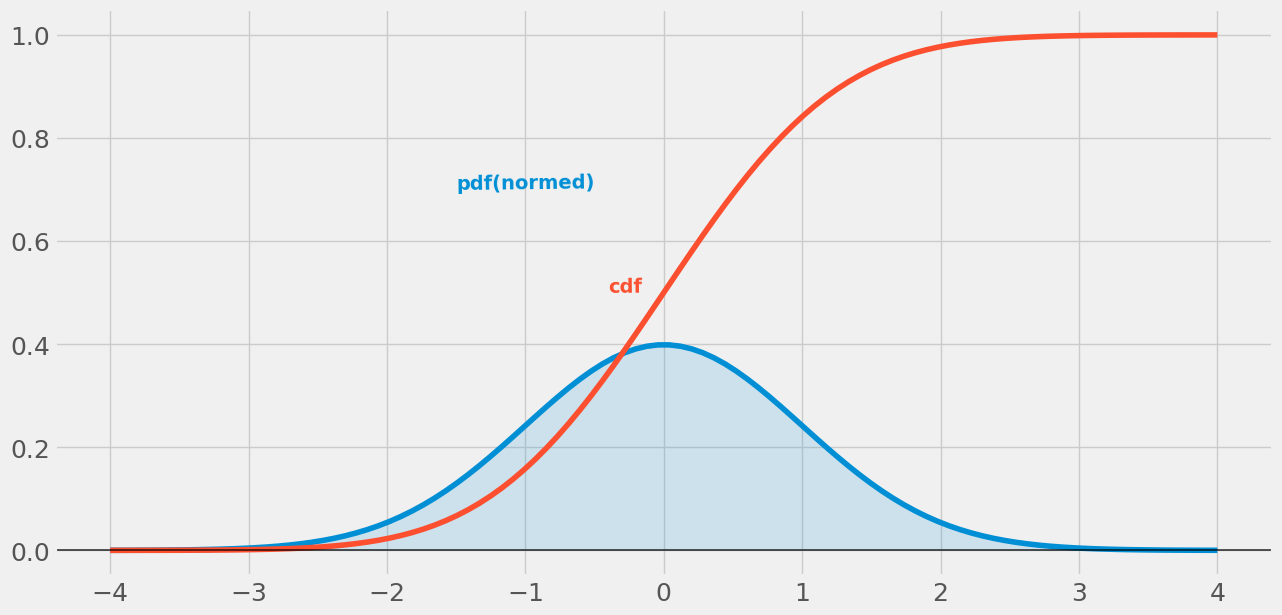

In [9]:
#导入工具包
from scipy.stats import norm  #该模块包含了所有的统计分析函数
from  matplotlib import style
from IPython.core.display import HTML

#PLOTTING CONFIG 绘图配置
%matplotlib inline
style.use('fivethirtyeight')
plt.rcParams['figure.figsize']=(14,7)
plt.figure(dpi=100)

#PDF 概率密度函数 
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100))) #从（-4，4）中随机选取100个数，绘制该事件的概率密度函数
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)),alpha=.15)#对曲线内部进行填充

#CDF 累积概率密度函数 
plt.plot(np.linspace(-4,4,100),norm.cdf(np.linspace(-4,4,100))) #cdf函数表示之前的概率累积的结果，-4处为0，4处为1

#LEGEND 图例
plt.text(x=-1.5,y=0.7,s="pdf(normed)",rotation=.65,weight="bold",color="#008fd5")
plt.text(x=-0.4,y=0.5,s="cdf",rotation=.65,weight="bold",color="#fc4f30")

#Ticks 坐标轴
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)

# 从结果图可以看出pdf是一个标准的正态分布曲线，均值为0，方差为1，符合该事件的规律。



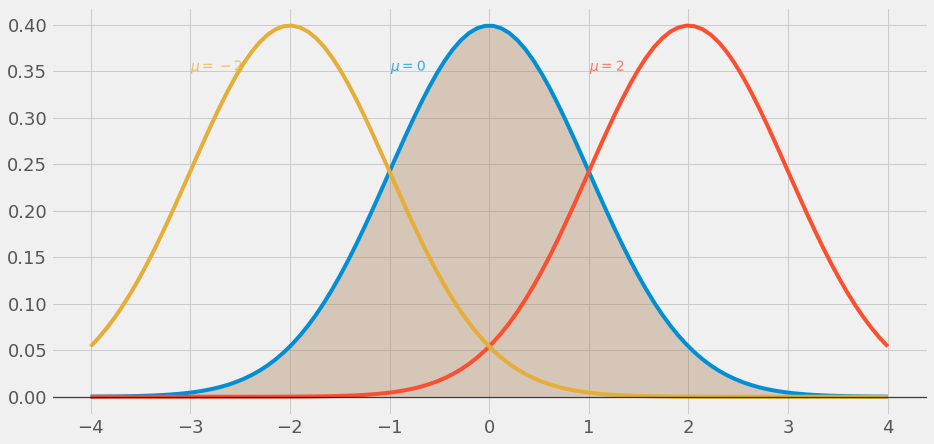

In [11]:
#不同的均值绘制出来的正态分布曲线形状也不同

#PDF  MU默认为0时
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)),alpha=.15)

#PDF MU=2时
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),loc=2))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)),alpha=.15)

#PDF MU=-2时
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),loc=-2))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100)),alpha=.15)

#LEGEND 图例
plt.text(x=-1,y=.35,s="$ \mu=0$",rotation=.65,alpha=.75,weight="bold",color="#008fd5")
plt.text(x=1,y=.35,s="$ \mu=2$",rotation=.65,alpha=.75,weight="bold",color="#fc4f30")
plt.text(x=-3,y=.35,s="$ \mu=-2$",rotation=.65,alpha=.75,weight="bold",color="#e5ae38")

#Ticks 坐标轴
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)


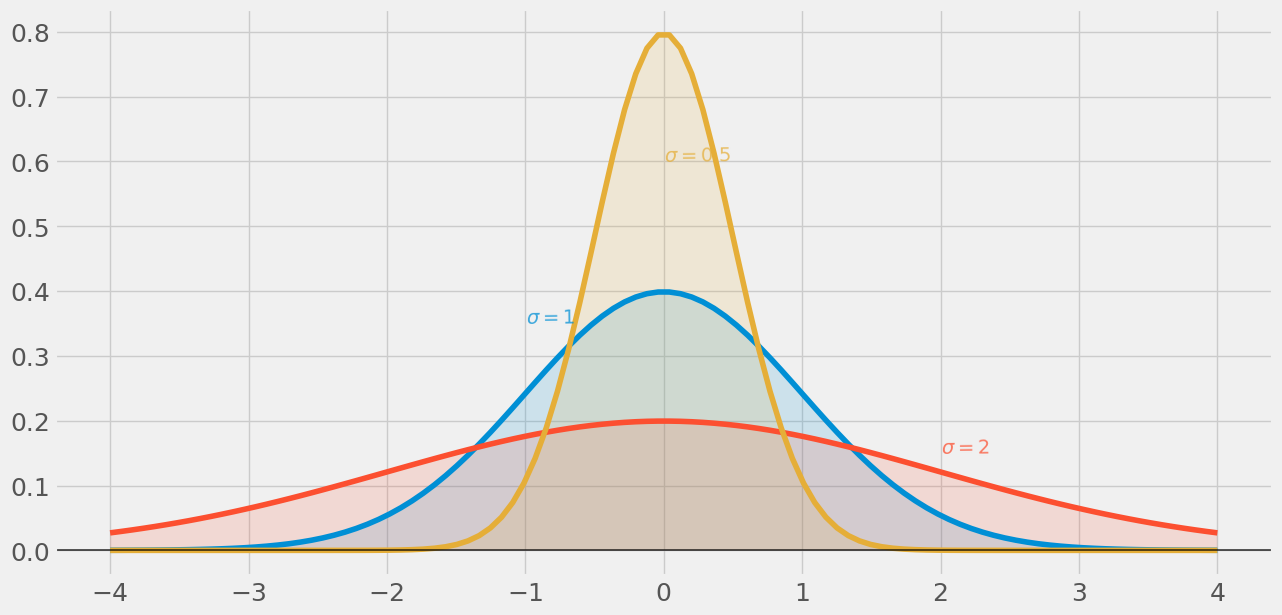

In [10]:
#当标准差不同时，正态分布曲线的形状也不同
plt.figure(dpi=100)

#PDF SIGMA=1
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=1))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=1),alpha=.15)

#PDF SIGMA=1
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=2))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=2),alpha=.15)

#PDF SIGMA=1
plt.plot(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=0.5))
plt.fill_between(np.linspace(-4,4,100),norm.pdf(np.linspace(-4,4,100),scale=0.5),alpha=.15)

#LEGEND 图例
plt.text(x=-1,y=.35,s="$ \sigma=1$",rotation=.65,alpha=.75,weight="bold",color="#008fd5")
plt.text(x=2,y=.15,s="$ \sigma=2$",rotation=.65,alpha=.75,weight="bold",color="#fc4f30")
plt.text(x=0,y=.6,s="$ \sigma=0.5$",rotation=.65,alpha=.75,weight="bold",color="#e5ae38")

#Ticks 坐标轴
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)

# 只有标准差不同时，标准差越大，正态分布曲线越平缓，标准差越小，正态分布曲线越陡。

-1.6059758862548896

[-1.60549343 -0.13535798 -0.39263531  0.78400205 -0.58892965  0.28967969
  0.06218773 -1.33025472  0.13253773 -1.03334253]

1.0234861889336746

pdf(x)= 0.24197072451914337
pdf(y)= 0.05399096651318806
P(x<0.3)=0.6179114221889526
P(-0.2<x<0.2)=0.15851941887820603


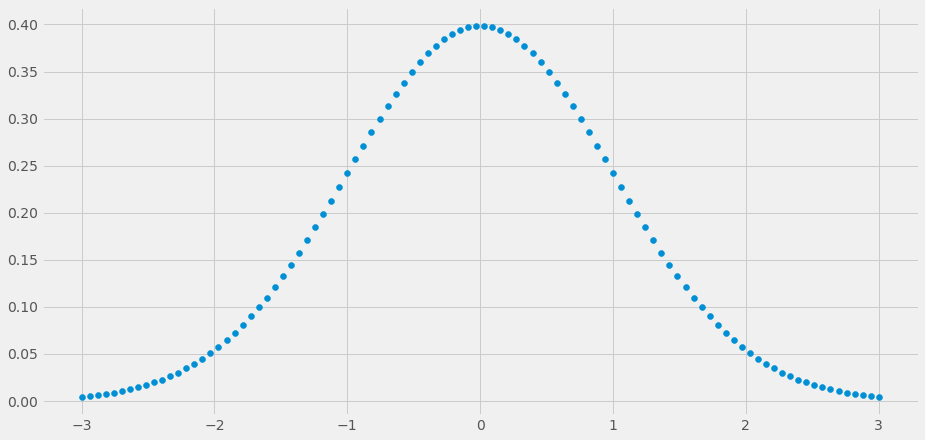

In [14]:
#获取正态分布的随机几个样本：可以使用norm.rvs()其中默认均值=0,方差=1,也可以自己指定。

#获得1个正态分布的随机样本
print(norm.rvs(),end="\n\n")

#获得10个正态分布的随机样本
print(norm.rvs(size=10),end="\n\n")

#自己指定均值和方差
print(norm.rvs(loc=1,scale=0.1),end="\n\n")

# PDF 概率密度函数 （Probability Density Function）
# **#随机变量X、Y的相对概率**
x = -1
y = 2
print("pdf(x)= {}\npdf(y)= {}".format(norm.pdf(x),norm.pdf(y)))

#绘制连续的概率密度曲线
x_s=np.linspace(-3,3,100)
y_s=norm.pdf(x_s)
plt.scatter(x_s,y_s)

# CDF 累积概率密度函数 （Cumnlative Probability Density Function） 可以指定一个范围求累积概率密度
 
#X小于0.3的概率密度之和
print("P(x<0.3)={}".format(norm.cdf(0.3)))

#X大于-0.2，小于0.2的概率密度之和
print("P(-0.2<x<0.2)={}".format(norm.cdf(0.2)-norm.cdf(-0.2)))


## 2、泊松分布 (Poisson Distribution)
　　通俗定义：假定一个事件，在一段时间内随即发生，且概率符合以下条件： 1.将该时间段分割成若干个小的时间段，在这个接近于0的小时间段里，该事件发生一次的概率与该小时间段的长度成正比。 2.在每个极小时间段内，该事件连续发生两次以上的概率恒等于0. 3.该事件在不同的小时间段里，发生与否相互独立。则该事件符合泊松分布。 泊松分布使用了以下符号： λ是事件发生的速率，t是时间间隔的长，X是该时间间隔内发生的事件数，其中X是泊松随机变量，X的分布称为泊松分布，令μ表示t时间间隔内平均发生的事件数，则μ=λ\*t。    


Text(8.5, 0.9, 'cdf')

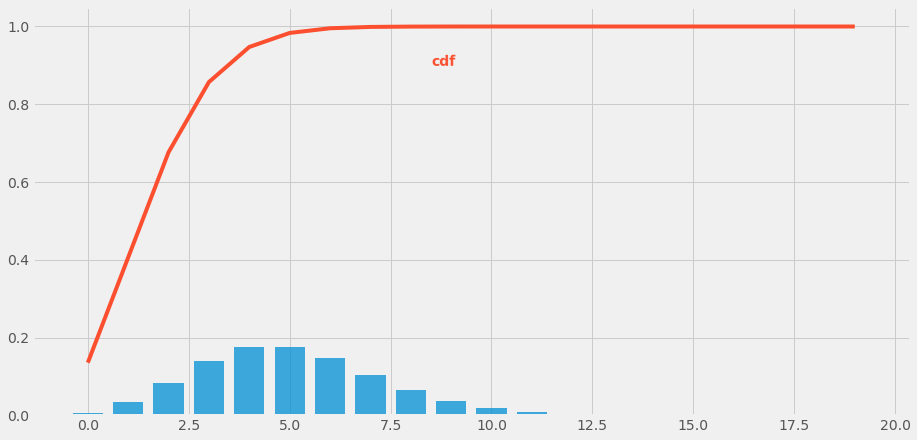

In [22]:
#泊松分布——绘图
from scipy.stats import poisson
from matplotlib import style

#PDF 绘制泊松分布的概率密度函数
plt.bar(np.arange(20),height=(poisson.pmf(np.arange(20),mu=5)),width=0.75,alpha=0.75)
#CDF 绘制泊松分布的累计概率曲线
plt.plot(np.arange(20),poisson.cdf(np.arange(20),mu=2),color="#fc4f30")

#LEGEND 图例
# plt.text(x=8,y=0.45,s="pmf(poisson)",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=8.5,y=0.9,s="cdf",rotation=.75,weight="bold",color="#fc4f30")


Text(14.5, 0.06, '$λ=10$')

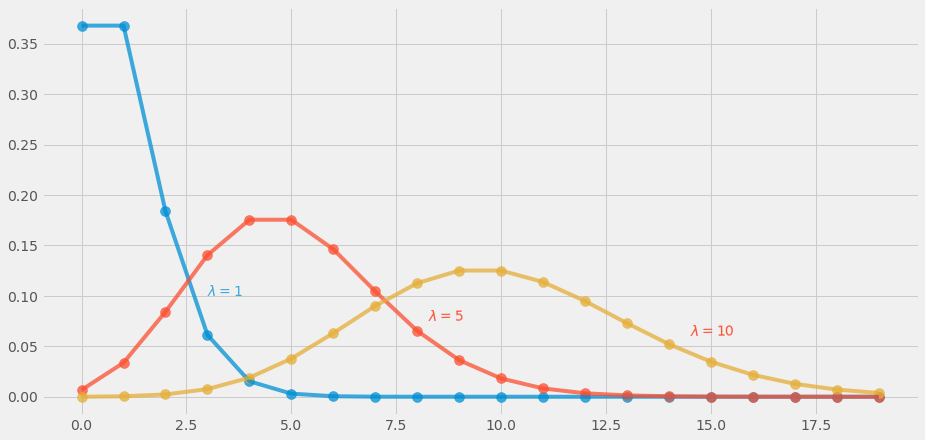

In [18]:
# PDF λ=1
plt.scatter(np.arange(20), poisson.pmf(np.arange(20),mu=1),alpha=0.75,s=100)
plt.plot(np.arange(20), poisson.pmf(np.arange(20),mu=1),alpha=0.75)

#PDF λ=5
plt.scatter(np.arange(20), poisson.pmf(np.arange(20),mu=5),alpha=0.75,s=100)
plt.plot(np.arange(20), poisson.pmf(np.arange(20),mu=5),alpha=0.75)

#PDF λ=10
plt.scatter(np.arange(20), poisson.pmf(np.arange(20),mu=10),alpha=0.75,s=100)
plt.plot(np.arange(20), poisson.pmf(np.arange(20),mu=10),alpha=0.75)

#LEGEND 图例
plt.text(x=3,y=0.1,s="$λ=1$",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=8.25,y=0.075,s="$λ=5$",rotation=.75,weight="bold",color="#fc4f30")
plt.text(x=14.5,y=0.06,s="$λ=10$",rotation=.75,weight="bold",color="#fc4f30")


p(x<3)=0.2650259152973616
p(2<x<8)=0.8072543457950705


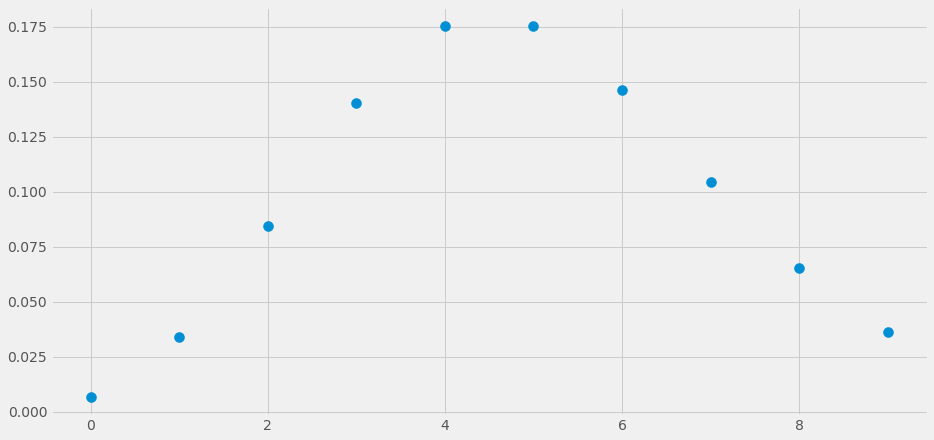

In [19]:
#绘制泊松分布的PMF曲线
x_s = np.arange(10)
y_s = poisson.pmf(k=x_s,mu=5)
plt.scatter(x_s,y_s,s=100)

#统计累积概率    CDF
#求事件发生次数小于3的概率
print("p(x<3)={}".format(poisson.cdf(k=3,mu=5)))

#求事件发生次数大于2小于8的概率
print("p(2<x<8)={}".format(poisson.cdf(k=8,mu=5)-poisson.cdf(k=2,mu=5)))


## 3、二项式分布
　　二项式分布就是只有两个可能结果的分布，比如成功或失败，抛一枚硬币的正反面， 两个可能结果的概率可以相等，也可以是不相等的，总和为1，例如如果成功的概率为0.2，那么失败的概率就是P=1-0.2=0.8. 每一次尝试都是独立的，因为前一次投掷的结果不能影响当前投掷的结果，只有两种可能结果且重复n次的试验叫做二项式，二项式的参数是 n和P，n是试验的总次数，P是试验的概率。
　　在上述说明的基础上，二项式的属性包括： 1.每个试验都是独立的。 2.实验中只有两个可能的结果：成功和失败。 3.总共进行了相同地n次实验。 4.所有实验成功和失败的概率是相同的。（所有实验都是相同的）
　　PMF （概率质量函数）对离散随机变量的定义，是离散随机变量在各个特定取值的概率。该函数通俗来说，就是对一个离散型概率事件来说，使用该函数来求它各个成功事件结果的概率。 PDF (概率密度函数） 是对连续型随机变量的定义，与PMF不同的是，在特定点上的值并不是该点的概率，连续随机概率事件只能求连续一段区域内发生事件的概率，通过对这段区间进行积分，可获得事件发生时间落在给定间隔内的概率。

Text(14.5, 0.9, 'cdf')

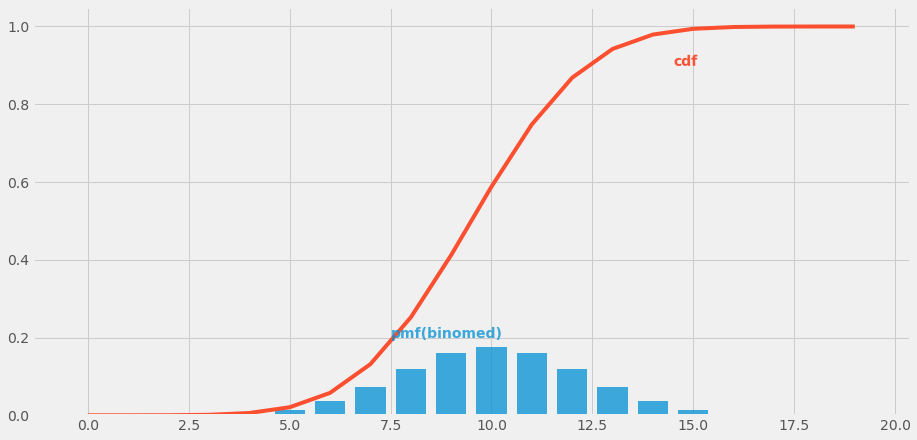

In [23]:
#导入需要的包
from scipy.stats import binom
from matplotlib import style

#PMF  绘制概率质量函数
plt.bar((np.arange(20)),height=(binom.pmf(np.arange(20),p=0.5,n=20)),width=0.75,alpha=0.75) #binom.pmf为二项式的概率质量数
#n=20,P=0.5,绘制成柱形图

#CDF
plt.plot(np.arange(20),binom.cdf(np.arange(20),p=0.5,n=20),color="#fc4f30") #绘制该二项式的累积密度函数曲线

#LEGEND 图例
plt.text(x=7.5,y=0.2,s="pmf(binomed)",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=14.5,y=0.9,s="cdf",rotation=.75,weight="bold",color="#fc4f30")


Text(17.5, 0.075, '#p=0.9')

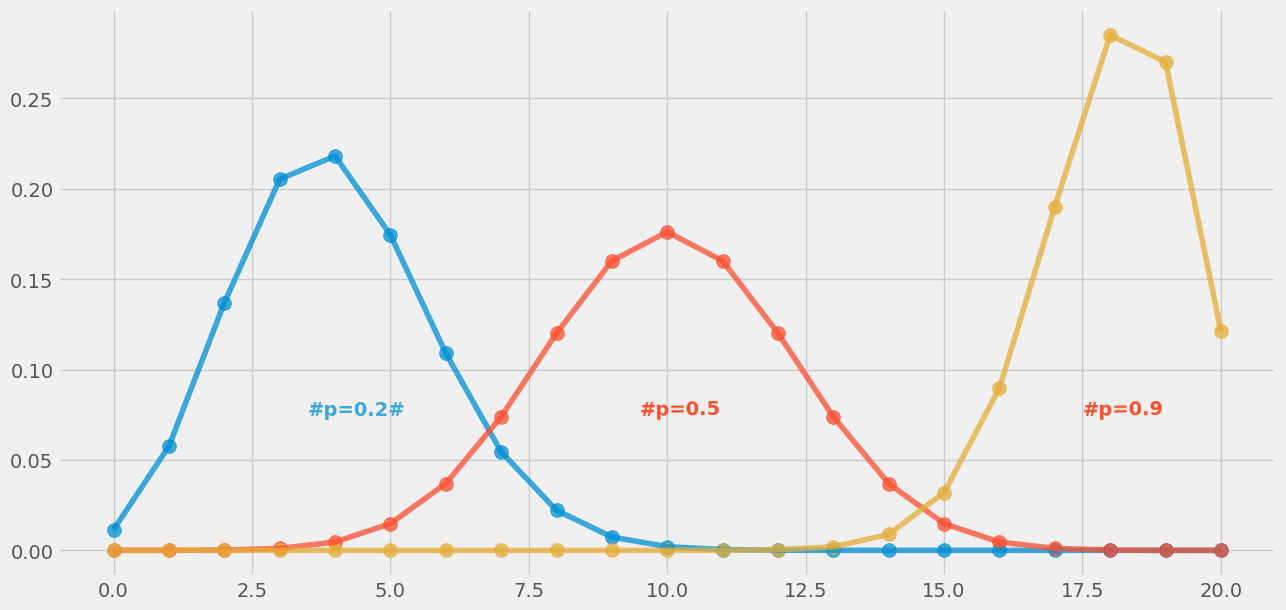

In [24]:
plt.figure(dpi=100)

#PDF P=0.2
plt.scatter(np.arange(21),stats.binom.pmf(np.arange(21),p=0.2,n=20),alpha=0.75,s=100)
plt.plot(np.arange(21),stats.binom.pmf(np.arange(21),p=0.2,n=20),alpha=0.75)

#PDF P=0.5
plt.scatter(np.arange(21),stats.binom.pmf(np.arange(21),p=0.5,n=20),alpha=0.75,s=100)
plt.plot(np.arange(21),stats.binom.pmf(np.arange(21),p=0.5,n=20),alpha=0.75)

#PDF P=0.9
plt.scatter(np.arange(21),stats.binom.pmf(np.arange(21),p=0.9,n=20),alpha=0.75,s=100)
plt.plot(np.arange(21),stats.binom.pmf(np.arange(21),p=0.9,n=20),alpha=0.75)

#LEGEND 图例
plt.text(x=3.5,y=0.075,s="#p=0.2#",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=9.5,y=0.075,s="#p=0.5",rotation=.75,weight="bold",color="#fc4f30")
plt.text(x=17.5,y=0.075,s="#p=0.9",rotation=.75,weight="bold",color="#fc4f30")



Text(10, 0.175, '$N=0.9$')

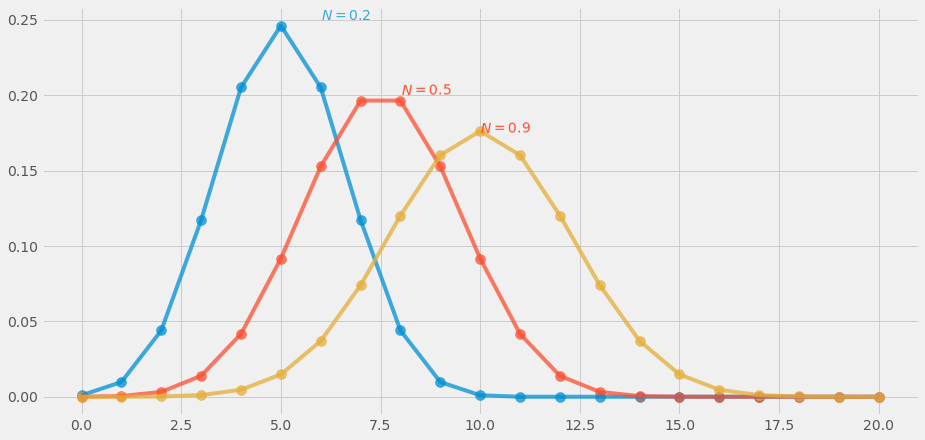

In [25]:
#PDF N=10
plt.scatter(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=10),alpha=0.75,s=100)
plt.plot(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=10),alpha=0.75)

#PDF N=15
plt.scatter(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=15),alpha=0.75,s=100)
plt.plot(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=15),alpha=0.75)

#PDF N=20
plt.scatter(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=20),alpha=0.75,s=100)
plt.plot(np.arange(21),binom.pmf(np.arange(21),p=0.5,n=20),alpha=0.75)

#LEGEND 图例
plt.text(x=6,y=0.25,s="$N=0.2$",alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=8,y=0.2,s="$N=0.5$",rotation=.75,weight="bold",color="#fc4f30")
plt.text(x=10,y=0.175,s="$N=0.9$",rotation=.75,weight="bold",color="#fc4f30")

# 当N不同时，成功m次的可能性的最大值都出现在均值处，对应概率为n*p。

p(x=1)=0.12106082099999989
p(x=7)=0.12106082099999989
p(x<=3) = 0.6496107184000002
p(2< x <=8)=0.6170735277000002


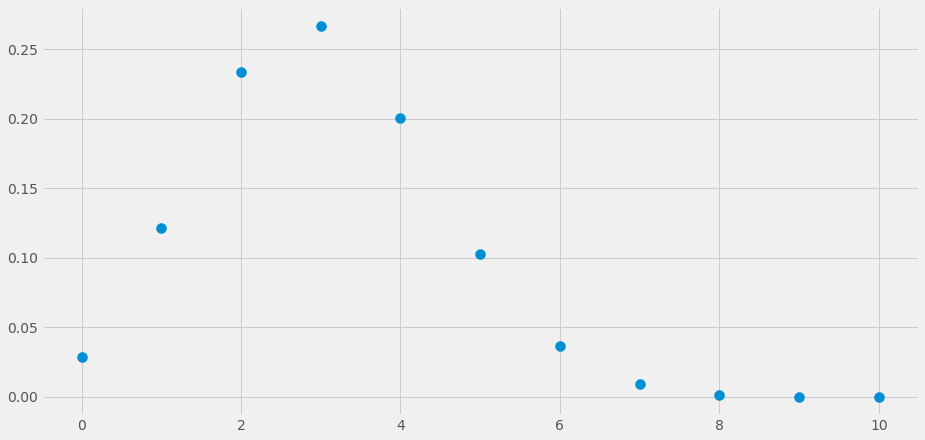

In [27]:
#绘制PMF
#随机变量x、y的概率
x=1
y=7
print("p(x=1)={}\np(x=7)={}".format(binom.pmf(k=x,p=0.3,n=10),stats.binom.pmf(k=x,p=0.3,n=10)))

#绘制二项式PMF
x_s=np.arange(11)
y_s=binom.pmf(k=x_s,p=0.3,n=10)
plt.scatter(x_s,y_s,s=100) #离散型随机变量用散点图

#统计累积概率    CDF

#求成功小于三次的概率
print("p(x<=3) = {}".format(binom.cdf(k=3,p=0.3,n=10)))

#求成功次数大于2次，小于8次的概率      
print("p(2< x <=8)={}".format(binom.cdf(k=8,p=0.3,n=10)- binom.cdf(k=2,p=0.3,n=10)))


## 4、卡方分布
　　通俗地说就是通过小数量的样本容量去估计总体容量的分布情况。 卡方检验就是统计样本的实际观测值与理论推断值的偏离程度。 卡方检验的基本思想就是根据样本数据推断总体的频次与期望频次是否有显著性差异。 
chi2.pdf()  
参数：
+ q :上下尾概率
+ x :分位数
+ loc :[可选]位置参数。默认值= 0
+ scale:[可选]比例参数。默认值= 1
+ size :[int型元组，可选]形状或随机变量。
+ moments:[可选]由字母['mvsk']组成； “ m” =均值，“ v” =方差，“ s” = Fisher的偏度，“ k” = Fisher的峰度。 (默认=“ MV”)。  
   
Results:卡方连续随机变量
<br>
概率密度函数：  
chi2.pdf(x, n)   　　　　# 返回\chi^2(n)的概率密度函数在 x 处的值  
概率分布函数：  
chi2.cdf(x, n)   　　　　# 返回\chi^2(n)的概率密度函数在 0 到 x 上的积分，也就是概率分布函数的值  
chi2.sf(x, n)   　　　　 # 返回 1 - chi2.cdf(x, n)  
数学期望：  
chi2.expect( func = f , args=(n,) )  # 返回f(x)的期望  
分位数：  
chi2.isf(1-alpha, n)　　　　# 返回值s满足：chi2.cdf(s, n) = alpha，  s就是alpha分位数  
chi2.ppf(alpha, n)　　　　 # 返回值s满足：chi2.cdf(s, n) = alpha，  s就是alpha分位数  
分布的数量关系：  
chi2.mean(n)     　　　　# \chi^2(n) 的均值  
chi2.var(n)      　　　　# \chi^2(n) 的方差  
chi2.std(n)     　　　　# \chi^2(n) 的方差再开平方根  
chi2.median(n)    　　　　# \chi^2(n) 的中位数  
chi2.moment(a,n) 　　　　# \chi^2(n) 的 a 阶原点矩  


Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.06it/s]


          sumsquare_error          aic           bic    kl_div  ks_statistic  \
invgamma         0.000007  1535.322797 -2.340584e+06  0.006334      0.016583   
lognorm          0.002261  1631.617503 -1.760251e+06  2.265347      0.654314   

             ks_pvalue  
invgamma  2.579889e-24  
lognorm   0.000000e+00  
{'invgamma': (7.923739920425006, -61.60583774111482, 1130.6436989378603), 'lognorm': (4.250145774638241, 1.4749863230293352, 2.35565466605176)}
************************
{'invgamma': {'a': 7.923739920425006, 'loc': -61.60583774111482, 'scale': 1130.6436989378603}}
count    100000.000000
mean        101.356384
std          63.343766
min           1.474986
25%          54.635821
50%          88.215453
75%         134.294560
max         578.834748
dtype: float64


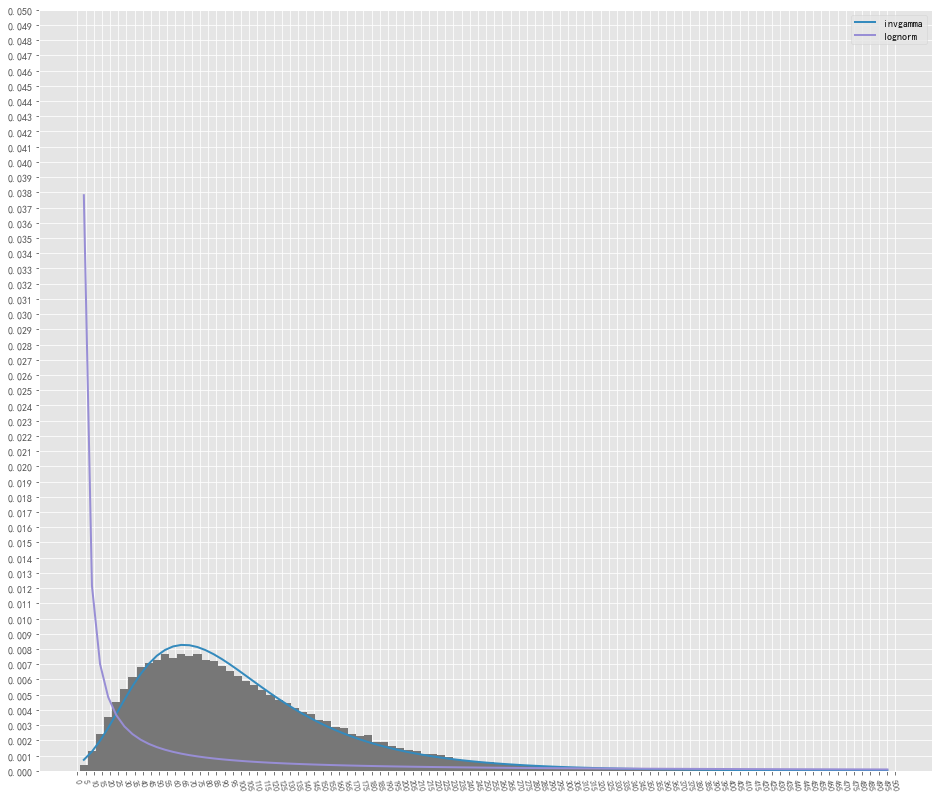

In [90]:
#卡方分布——画图
from scipy.stats import chi2
from matplotlib import style

s, loc, scale = 5, 0.6, 20


datas = chi2.rvs(s, loc=loc, scale=scale, size=100000)

# datas = list()
# for i in range(100000):
#     datas.append(lognorm.rvs(s, loc=loc, scale=scale, size=100000)[0])
# datas = [100 - i for i in datas if 100 - i > 0]

# f = Fitter(datas, xmin=-2, xmax=51, distributions=['lognorm', ], bins=50)
f = Fitter(datas, xmin=-2, xmax=501, distributions=['lognorm','invgamma' ], bins=100)
f.fit()
# f = Fitter(datas, xmin=-2, xmax=1200, distributions=['betaprime','burr12','dweibull','chi2','foldcauchy','logistic'], bins=100)

print(f.summary())
print(f.fitted_param)
# print(f.fitted_pdf)
print("*" * 24)
print(f.get_best())
f.hist()

# plt.ylim(0, 0.2)
# plt.xticks([int(_x) for _x in range(0,51, 1)], rotation=280, size=8)
# plt.yticks([_y/100 for _y in range(0, 21, 1)], size=10)


plt.ylim(0, 0.05)
plt.xticks([int(_x) for _x in range(0,501, 5)], rotation=280, size=8)
plt.yticks([_y/1000 for _y in range(0, 51, 1)], size=10)

# print(list(range(0, 10)))
# print([_y//100 for _y in range(0, 10)])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
# print(datas)
print(pd.Series(datas).describe())


plt.show()


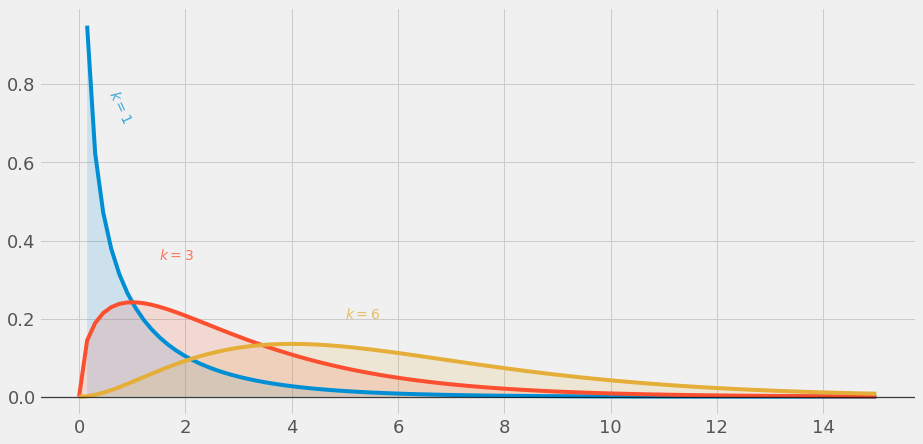

In [29]:
#探究自由度K大小对结果的影响：
#PDF    K=1
plt.plot(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=1))
plt.fill_between(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=1),alpha=0.15)

#PDF    K=3
plt.plot(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=3))
plt.fill_between(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=3),alpha=0.15)

#PDF    K=6
plt.plot(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=6))
plt.fill_between(np.linspace(0,15,100),chi2.pdf(np.linspace(0,15,100),df=6),alpha=0.15)


#LEGEND 图例
plt.text(x=0.5,y=0.7,s="$ k=1$",rotation=-65,alpha=.75,weight="bold",color="#008fd5")
plt.text(x=1.5,y=.35,s="$ k=3$",alpha=.75,weight="bold",color="#fc4f30")
plt.text(x=5,y=.2,s="$ k=6$",alpha=.75,weight="bold",color="#e5ae38")

#Ticks 坐标轴
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)

# 可以看出K越大，图像越趋近于标准正态分布。

P(X<=3)=0.4421745996289252
P(2<X<=8)=0.4421745996289252


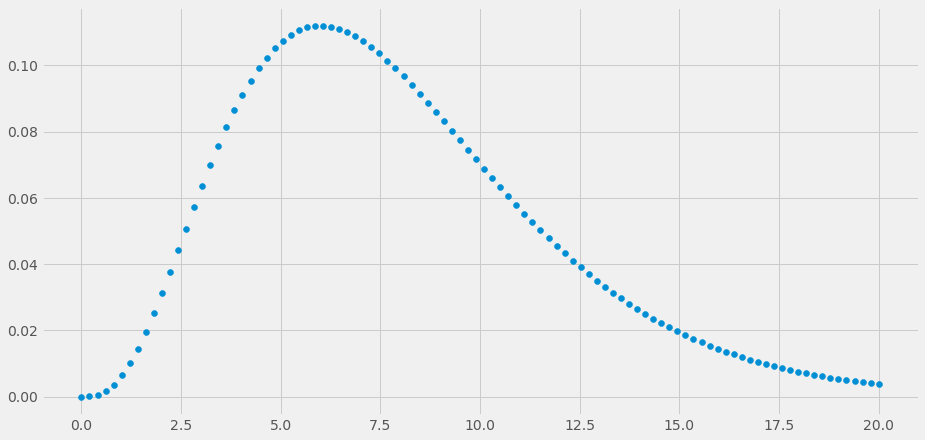

In [30]:
#绘制卡方分布曲线
x_s=np.linspace(0,20,100)
y_s=stats.chi2.pdf(x_s,df=8)
plt.scatter(x_s,y_s)


# CDF 累积概率密度函数 :（Cumnlative Probability Density Function） 可以指定一个范围求累积概率密度


#X<=3的概率密度之和
print("P(X<=3)={}".format(chi2.cdf(x=3,df=4)))
#2<X<=8的概率密度之和
print("P(2<X<=8)={}".format(chi2.cdf(x=3,df=4)))


## 5、均匀分布
定义：对于掷骰子来说或，结果为1到6，得到任何一个结果的概率都一样，这就是均匀分布，均匀分布得到的n个结果的可能性都相同，如果随机变量X是均匀分布的，则密度函数可以表示为： f(x)=1/b-a (b<x<a) 均匀分布的曲线是一个矩形，均匀分布又称为矩形分布。

Text(-0.4, 0.5, 'cdf')

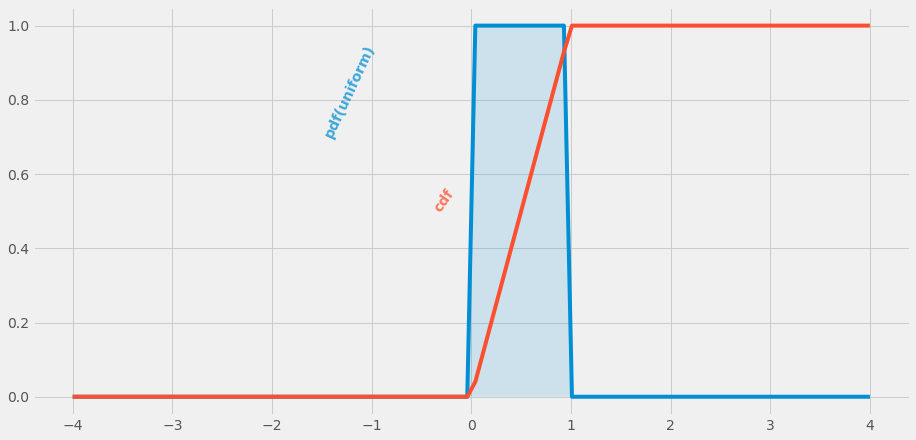

In [31]:
#绘图——均匀分布
from scipy.stats import uniform
from matplotlib import style

#PDF 
plt.plot(np.linspace(-4,4,100),uniform.pdf(np.linspace(-4,4,100)))
plt.fill_between(np.linspace(-4,4,100),uniform.pdf(np.linspace(-4,4,100)),alpha=0.15)

#CDF
plt.plot(np.linspace(-4,4,100),uniform.cdf(np.linspace(-4,4,100)))

#LEGEND 图例
plt.text(x=-1.5,y=0.7,s="pdf(uniform)",rotation=65,alpha=0.75,weight="bold",color="#008fd5")
plt.text(x=-0.4,y=0.5,s="cdf",rotation=55,alpha=0.75,weight="bold",color="#fc4f30")



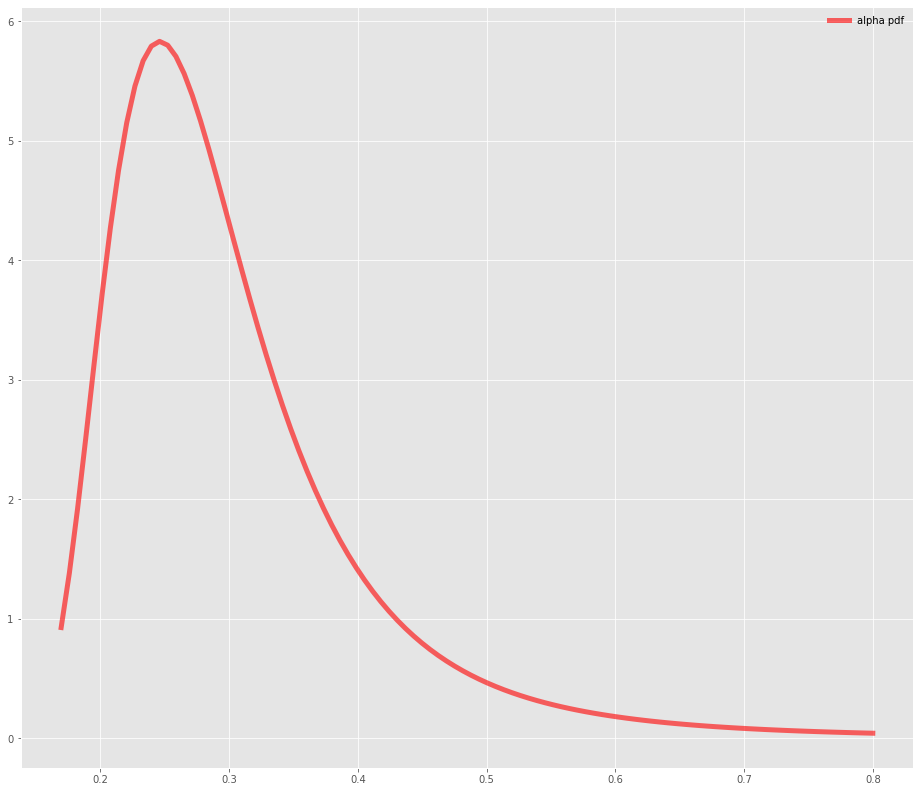

In [19]:
# alpha
from scipy.stats import alpha

fig, ax = plt.subplots(1, 1)
a = 3.57
mean, var, skew, kurt = alpha.stats(a, moments='mvsk')

x = np.linspace(alpha.ppf(0.01, a),
                alpha.ppf(0.99, a), 100)
ax.plot(x, alpha.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='alpha pdf')

ax.legend(loc='best', frameon=False)
plt.show()

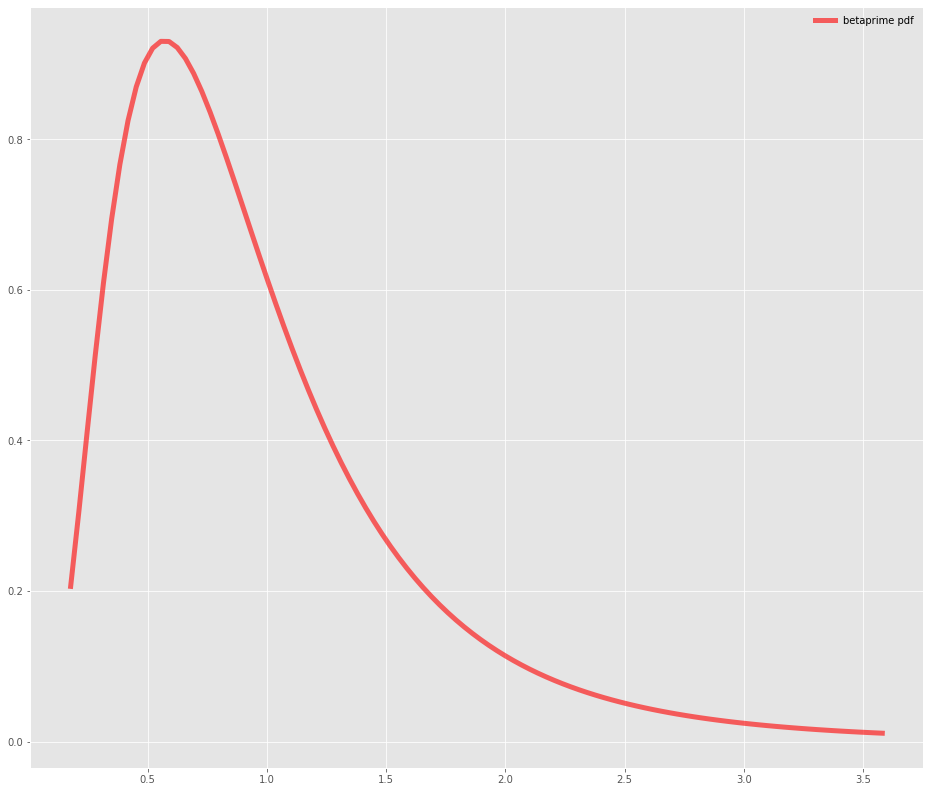

In [28]:
# 贝塔素数连续随机变量。
from scipy.stats import betaprime

fig, ax = plt.subplots(1, 1)
# betaprime(a=5.00, loc=0.00, scale=1.00, b=6.00)

a, b = 5, 6
mean, var, skew, kurt = betaprime.stats(a, b, moments='mvsk')
x = np.linspace(betaprime.ppf(0.01, a, b),
                betaprime.ppf(0.99, a, b), 100)
ax.plot(x, betaprime.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='betaprime pdf')
ax.legend(loc='best', frameon=False)
plt.show()

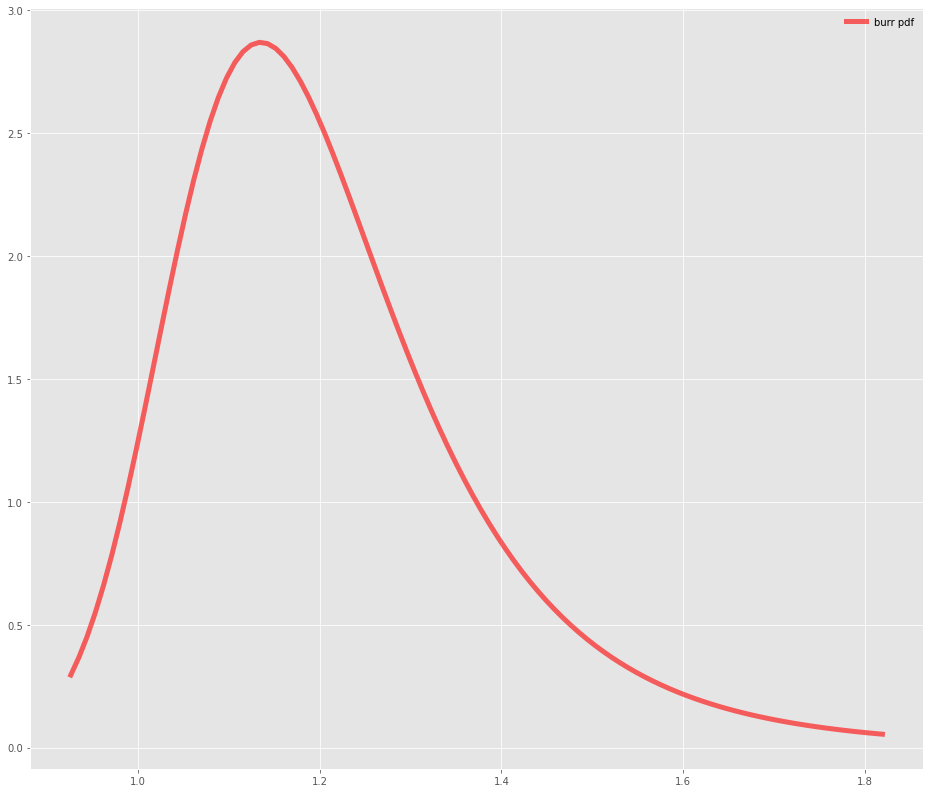

In [35]:
# Burr(III型)连续随机变量
from scipy.stats import burr

fig, ax = plt.subplots(1, 1)
c, d = 10, 4
mean, var, skew, kurt = burr.stats(c, d, moments='mvsk')

x = np.linspace(burr.ppf(0.01, c, d),
                burr.ppf(0.99, c, d), 100)
ax.plot(x, burr.pdf(x, c, d),
       'r-', lw=5, alpha=0.6, label='burr pdf')

ax.legend(loc='best', frameon=False)
plt.show()

In [36]:
# Erlang连续随机变量
from scipy.stats import erlang



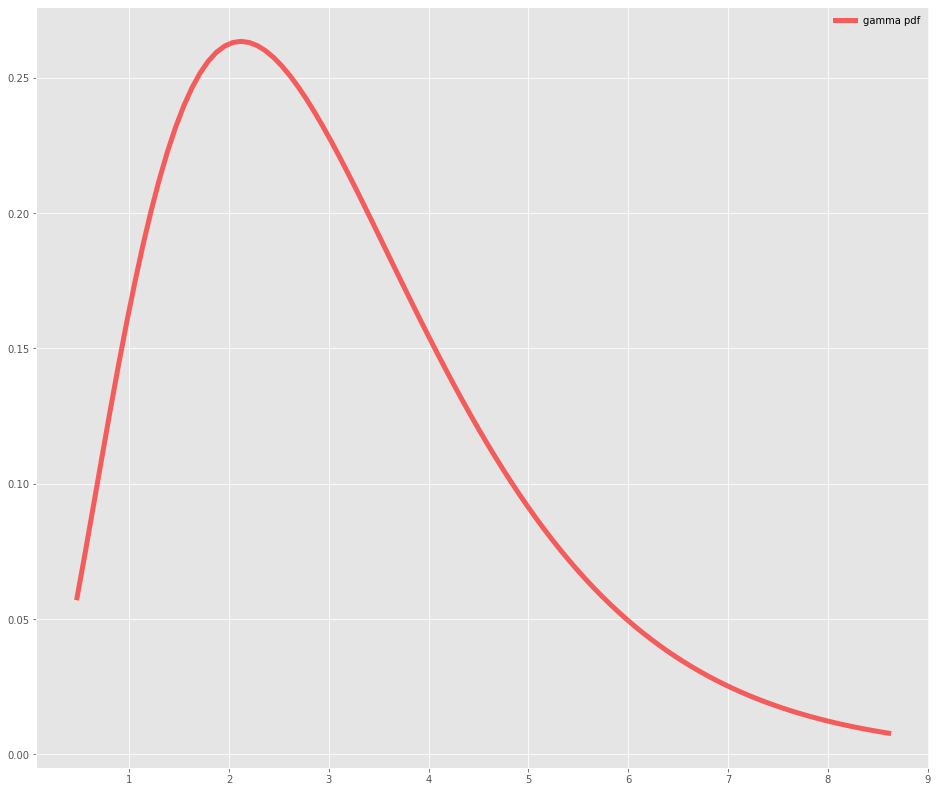

In [40]:
# gamma 分布
from scipy.stats import gamma

fig, ax = plt.subplots(1, 1)

a = 3.12
mean, var, skew, kurt = gamma.stats(a, moments='mvsk')

x = np.linspace(gamma.ppf(0.01, a),
                gamma.ppf(0.99, a), 100)
ax.plot(x, gamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='gamma pdf')

ax.legend(loc='best', frameon=False)
plt.show()

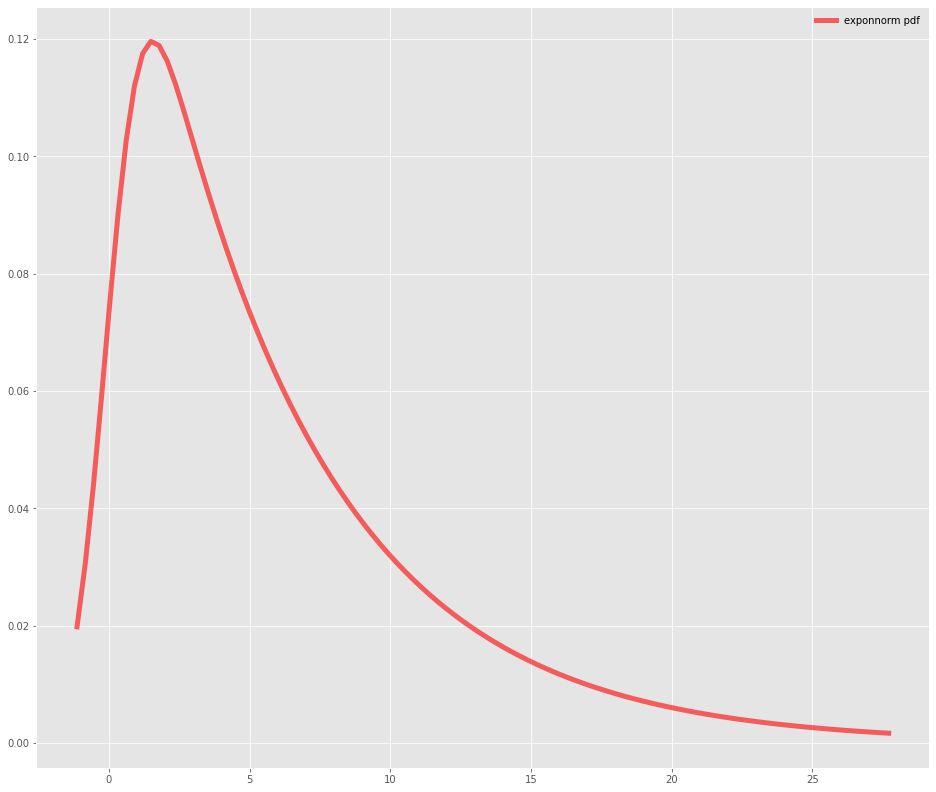

In [44]:
# 指数修正的正态连续随机变量
from scipy.stats import exponnorm

ig, ax = plt.subplots(1, 1)

K = 6
mean, var, skew, kurt = exponnorm.stats(K, moments='mvsk')

x = np.linspace(exponnorm.ppf(0.01, K),
                exponnorm.ppf(0.99, K), 100)
ax.plot(x, exponnorm.pdf(x, K),
       'r-', lw=5, alpha=0.6, label='exponnorm pdf')

ax.legend(loc='best', frameon=False)
plt.show()

## F分布
概率密度函数：  
f.pdf(x, m, n)     　　　　　 # 返回F(m,n)的概率密度函数在x处的值  
概率分布函数：  
f.cdf(x, m, n)      　　　　　# 返回F(m,n)的概率密度函数在0到x上的积分，也就是概率分布函数的值  
chi2.sf(x, n)       　　　　　# 返回 1 - f.cdf(x, m, n)  
数学期望：  
f.expect( func = g , args=(m, n) )　　　　# 返回g(x)的数学期望  
分位数：  
f.isf(1-alpha, m, n)　　　　　# 返回值s满足：chi2.cdf(s, n) = alpha，  s就是alpha分位数  
f.ppf(alpha, m, n)  　　　　　# 返回值s满足：chi2.cdf(s, n) = alpha，  s就是alpha分位数  
分布的数量关系：  
f.mean(m, n)       　　　　　 # F(m,n) 的均值  
f.var(m, n)         　　　　　# F(m,n) 的方差  
f.std(m, n)         　　　　　# F(m,n) 的方差再开平方根  
f.median(m, n)      　　　　　# F(m,n) 的中位数  
f.moment(a, m, n)  　　　　　 # F(m,n) 的 a 阶原点矩  

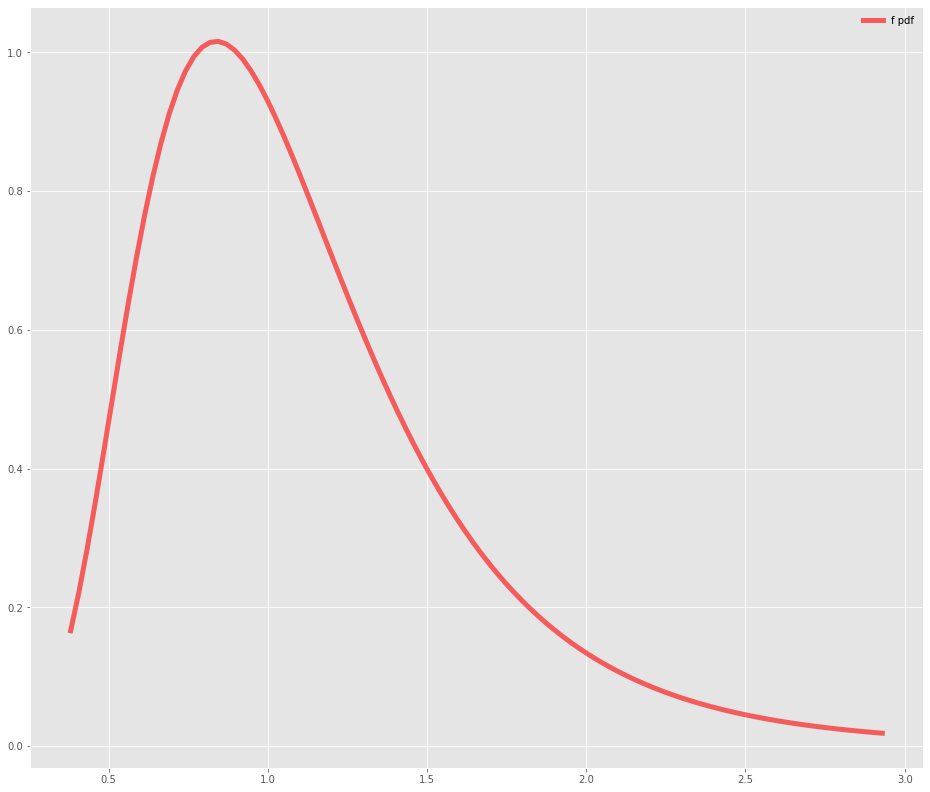

In [49]:
# F连续的随机变量
from scipy.stats import f
fig, ax = plt.subplots(1, 1)

dfn, dfd = 29, 18
mean, var, skew, kurt = f.stats(dfn, dfd, moments='mvsk')

x = np.linspace(f.ppf(0.01, dfn, dfd),
                f.ppf(0.99, dfn, dfd), 100)
ax.plot(x, f.pdf(x, dfn, dfd),
       'r-', lw=5, alpha=0.6, label='f pdf')

ax.legend(loc='best', frameon=False)
plt.show()

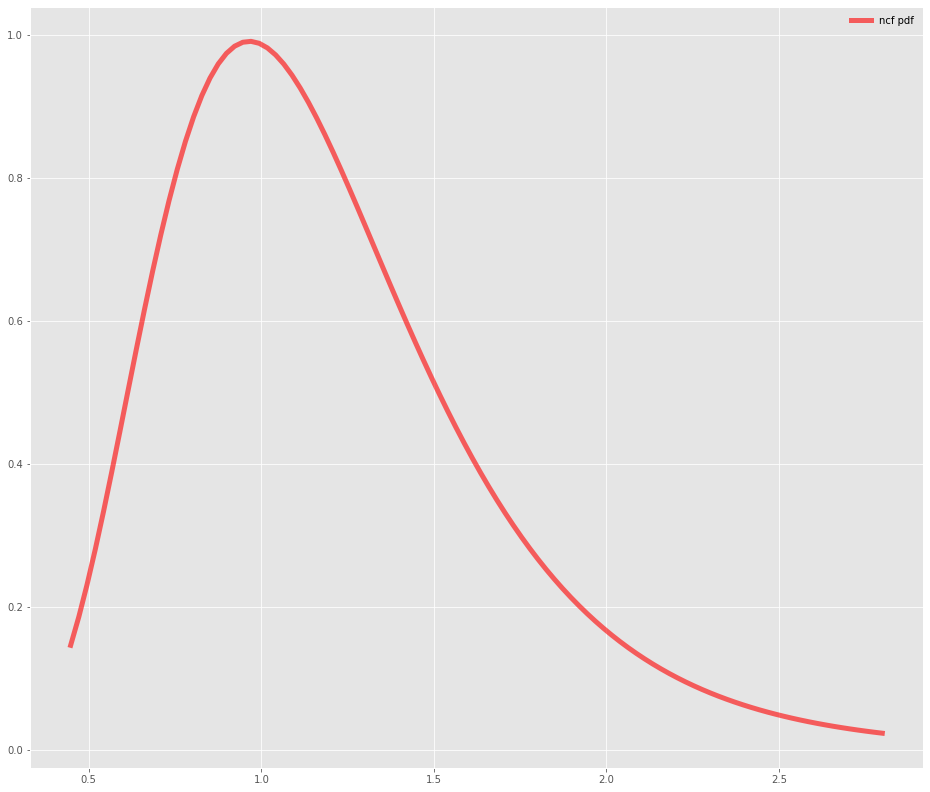

In [54]:
# 非中心F分布连续型随机变量。

from scipy.stats import ncf
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

dfn, dfd, nc = 27, 27, 3.2
mean, var, skew, kurt = ncf.stats(dfn, dfd, nc, moments='mvsk')

x = np.linspace(ncf.ppf(0.01, dfn, dfd, nc),
                ncf.ppf(0.99, dfn, dfd, nc), 100)
ax.plot(x, ncf.pdf(x, dfn, dfd, nc),
       'r-', lw=5, alpha=0.6, label='ncf pdf')

ax.legend(loc='best', frameon=False)
plt.show()

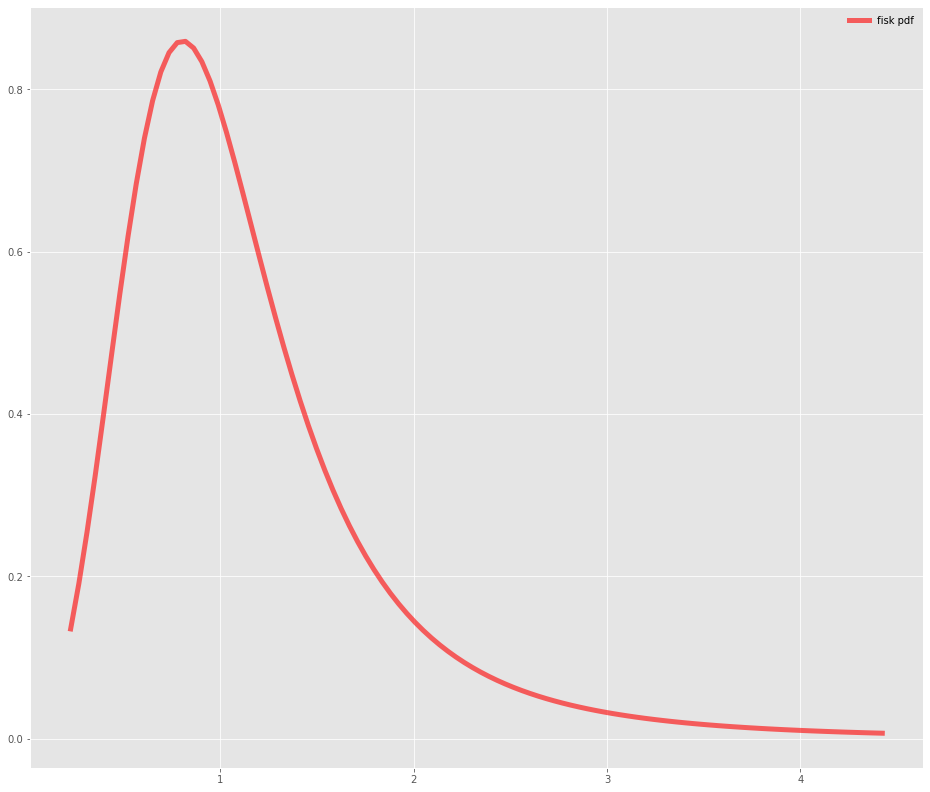

In [56]:
# FISK连续随机变量,也称为对数逻辑分布。

from scipy.stats import fisk
fig, ax = plt.subplots(1, 1)

c = 3.09
mean, var, skew, kurt = fisk.stats(c, moments='mvsk')

x = np.linspace(fisk.ppf(0.01, c),
                fisk.ppf(0.99, c), 100)
ax.plot(x, fisk.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='fisk pdf')

ax.legend(loc='best', frameon=False)
plt.show()

Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.08it/s]


************************
count    1000.000000
mean       69.871661
std        25.059649
min       -11.181343
25%        53.377004
50%        72.403488
75%        87.711340
max       123.387152
dtype: float64


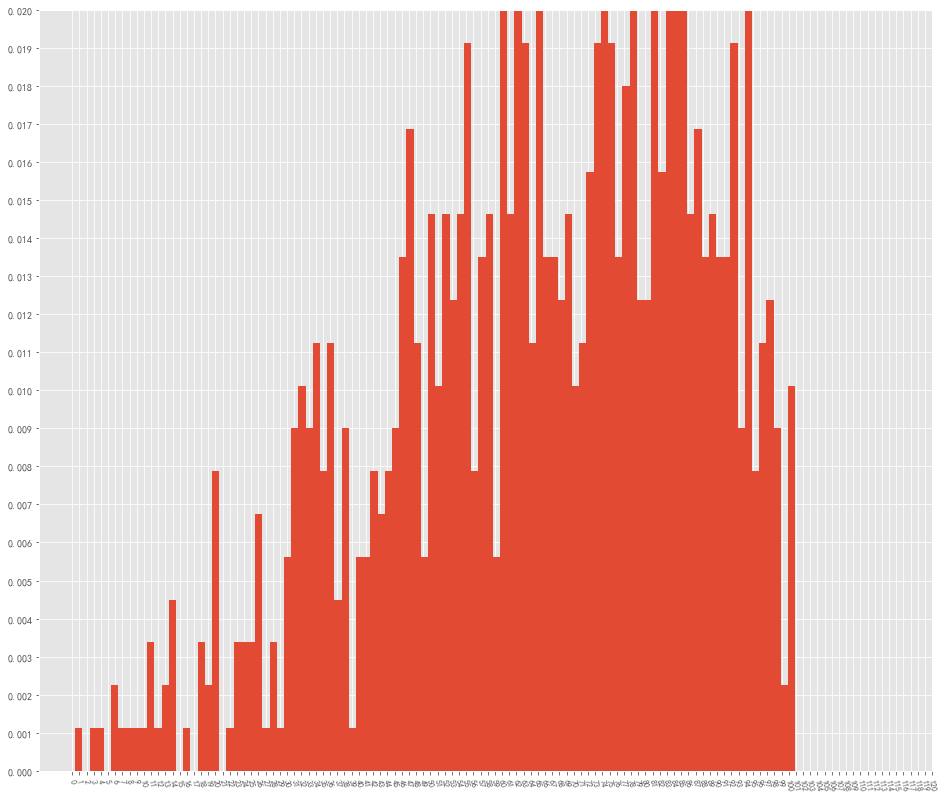

In [21]:
# 广义极值连续型随机变量。

from scipy.stats import genextreme
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# c = -0.002
# mean, var, skew, kurt = genextreme.stats(c, moments='mvsk')

# x = np.linspace(genextreme.ppf(0.01, c),
#                 genextreme.ppf(0.99, c), 100)
# ax.plot(x, genextreme.pdf(x, c),
#        'r-', lw=5, alpha=0.6, label='genextreme pdf')

# ax.legend(loc='best', frameon=False)
# plt.show()



c, loc, scale = 0.6534377053608116, 60.85122823876746, 26.504191099727073

datas = genextreme.rvs(s, loc=loc, scale=scale, size=1000)
# datas = [100 - i for i in datas if 100 - i > 0]

f = Fitter(datas, xmin=-1, xmax=101, distributions=['genextreme', ], bins=100)
f.fit()
# f = Fitter(datas, xmin=-2, xmax=1200, distributions=['betaprime','burr12','dweibull','chi2','foldcauchy','logistic'], bins=100)

# print(f.summary())
# print(f.fitted_param)
# print(f.fitted_pdf)
print("*" * 24)
# print(f.get_best())
f.hist()
plt.ylim(0, 0.016)
plt.xticks([int(_x) for _x in range(0,121, 1)], rotation=280, size=8)
plt.yticks([_y/1000 for _y in range(0, 21, 1)], size=10)
# print(list(range(0, 10)))
# print([_y//100 for _y in range(0, 10)])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
# print(datas)
print(pd.Series(datas).describe())


plt.show()



Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.32it/s]


************************
count    30000.000000
mean        63.314108
std         25.675120
min       -113.021648
25%         49.095418
50%         67.866958
75%         82.356939
max        109.865368
dtype: float64


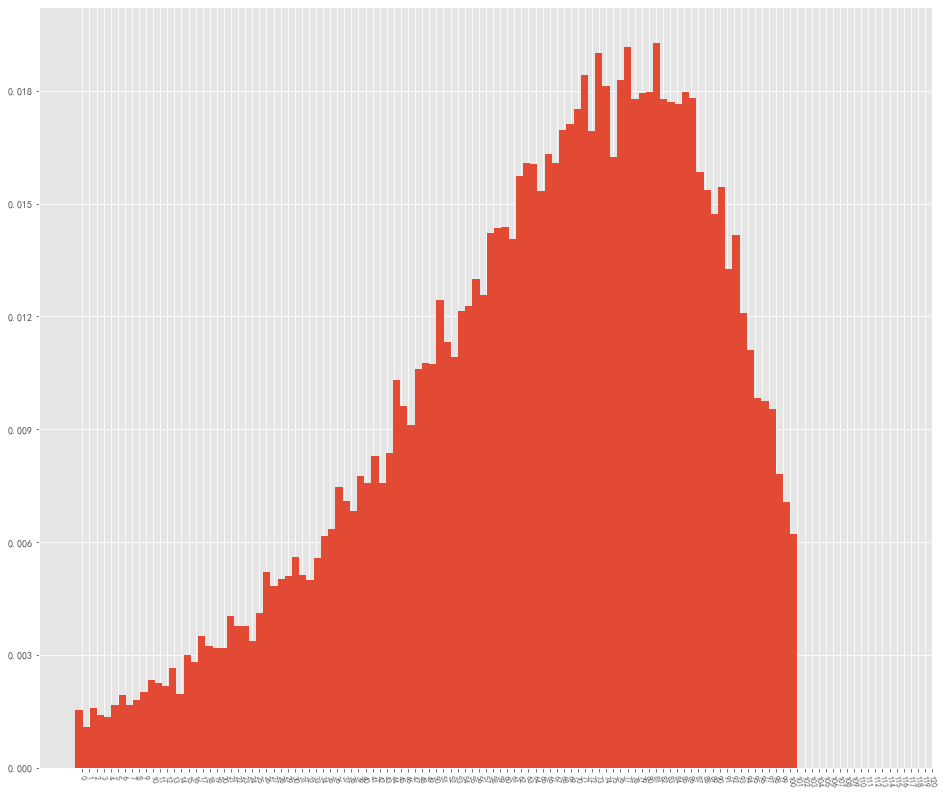

In [19]:
from scipy.stats import argus, genextreme, pearson3, norminvgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# c, loc, scale = 1.4635503752728733, -3.022082492826935, 104.03820323518993
# datas = argus.rvs(s, loc=loc, scale=scale, size=30000)


# a, b , loc, scale = 88.60285258026713, -88.4465740590669, 122.4597343330328, 3.429333992593236
# datas = norminvgauss.rvs(a, b, loc=loc, scale=scale, size=30000)


# a, b , loc, scale = 88.60285258026713, -88.4465740590669, 122.4597343330328, 3.429333992593236
# datas = norminvgauss.rvs(a, b, loc=loc, scale=scale, size=30000)

# # s, loc, scale = -1.3399954811840677, 64.76170788922403, 25.864044058222476
s, loc, scale = -1.1, 63, 26
datas = pearson3.rvs(s, loc=loc, scale=scale, size=30000)

# for i in range(30000):
#     if datas[i] > 100:
#         datas[i] = 100
#     if datas[i] < 0:
#         datas[i] = 100
# datas = [i for i in datas if i < 100 - i > 0]

f = Fitter(datas, xmin=-1, xmax=101, distributions=['argus', ], bins=100)
f.fit()
# f = Fitter(datas, xmin=-2, xmax=1200, distributions=['betaprime','burr12','dweibull','chi2','foldcauchy','logistic'], bins=100)

# print(f.summary())
# print(f.fitted_param)
# print(f.fitted_pdf)
print("*" * 24)
# print(f.get_best())
f.hist()
# plt.ylim(0, 0.016)
plt.xticks([int(_x) for _x in range(0,121, 1)], rotation=280, size=8)
plt.yticks([_y/1000 for _y in range(0, 21, 3)], size=10)
# print(list(range(0, 10)))
# print([_y//100 for _y in range(0, 10)])
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
# print(datas)
print(pd.Series(datas).describe())


plt.show()

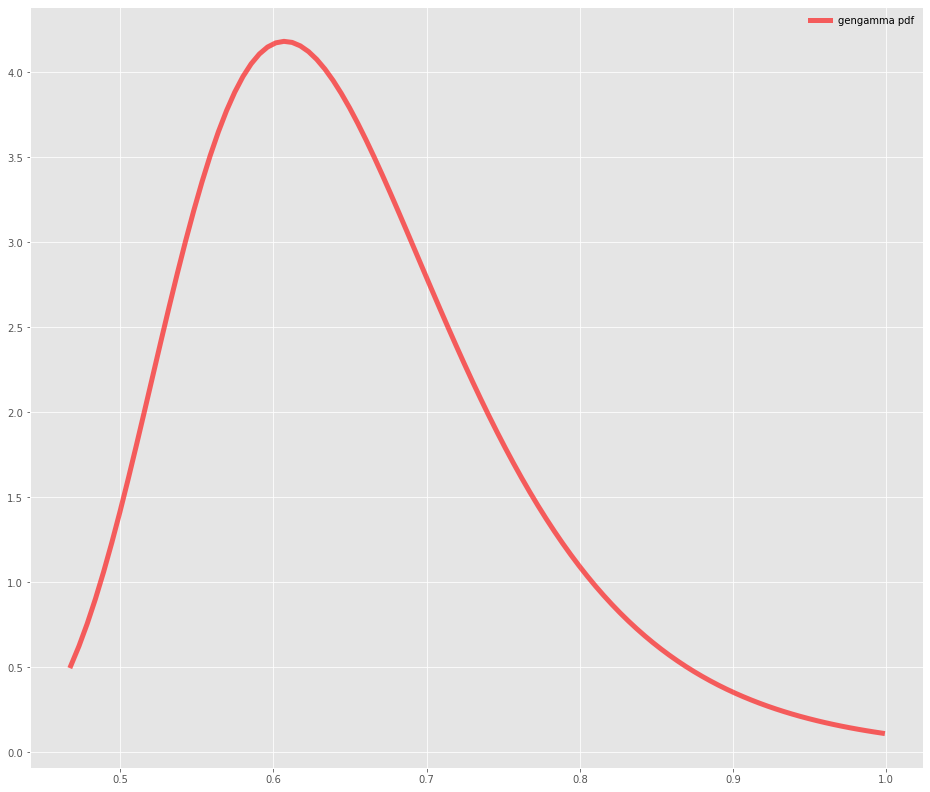

In [64]:
# 广义伽马连续随机变量。
from scipy.stats import gengamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

a, c = 4.42, -3.12
mean, var, skew, kurt = gengamma.stats(a, c, moments='mvsk')

x = np.linspace(gengamma.ppf(0.01, a, c),
                gengamma.ppf(0.99, a, c), 100)
ax.plot(x, gengamma.pdf(x, a, c),
       'r-', lw=5, alpha=0.6, label='gengamma pdf')

ax.legend(loc='best', frameon=False)
plt.show()

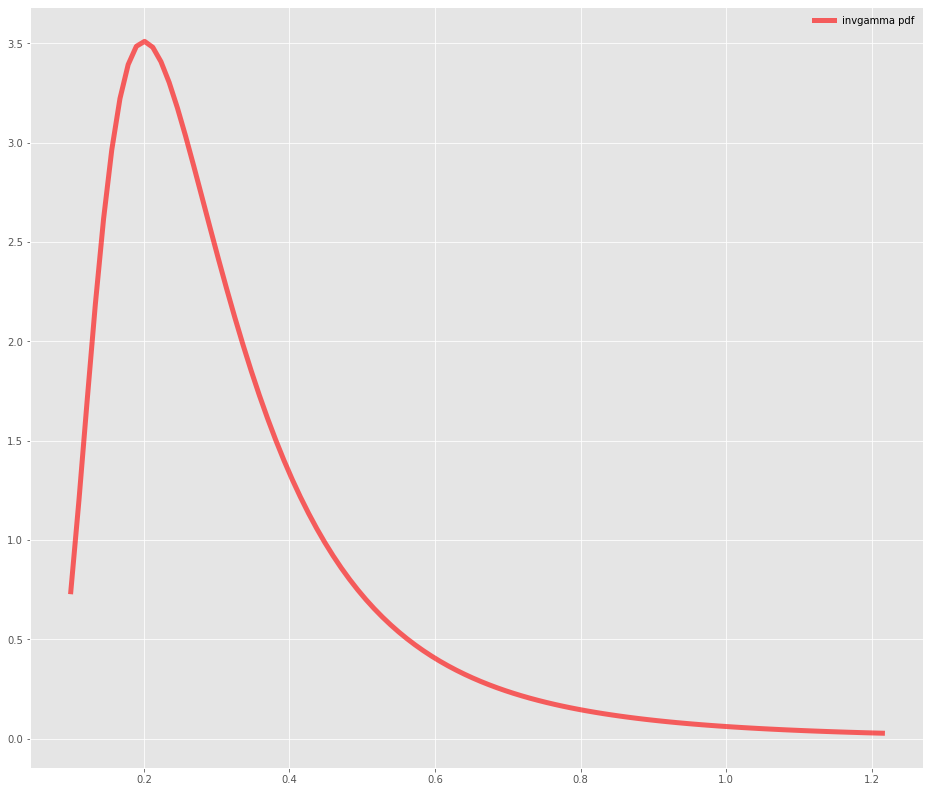

In [69]:
# 倒置的伽马连续随机变量。
from scipy.stats import invgamma
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

a = 4
mean, var, skew, kurt = invgamma.stats(a, moments='mvsk')

x = np.linspace(invgamma.ppf(0.01, a),
                invgamma.ppf(0.99, a), 100)
ax.plot(x, invgamma.pdf(x, a),
       'r-', lw=5, alpha=0.6, label='invgamma pdf')

ax.legend(loc='best', frameon=False)
plt.show()

Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.12it/s]


************************
{'invgauss': {'mu': 0.5284183942611855, 'loc': -1.2292893818277155, 'scale': 61.901170584492}}
count    10000.000000
mean        37.690364
std         34.620591
min          2.906304
25%         15.350330
50%         26.720903
75%         47.405563
max        407.171888
dtype: float64


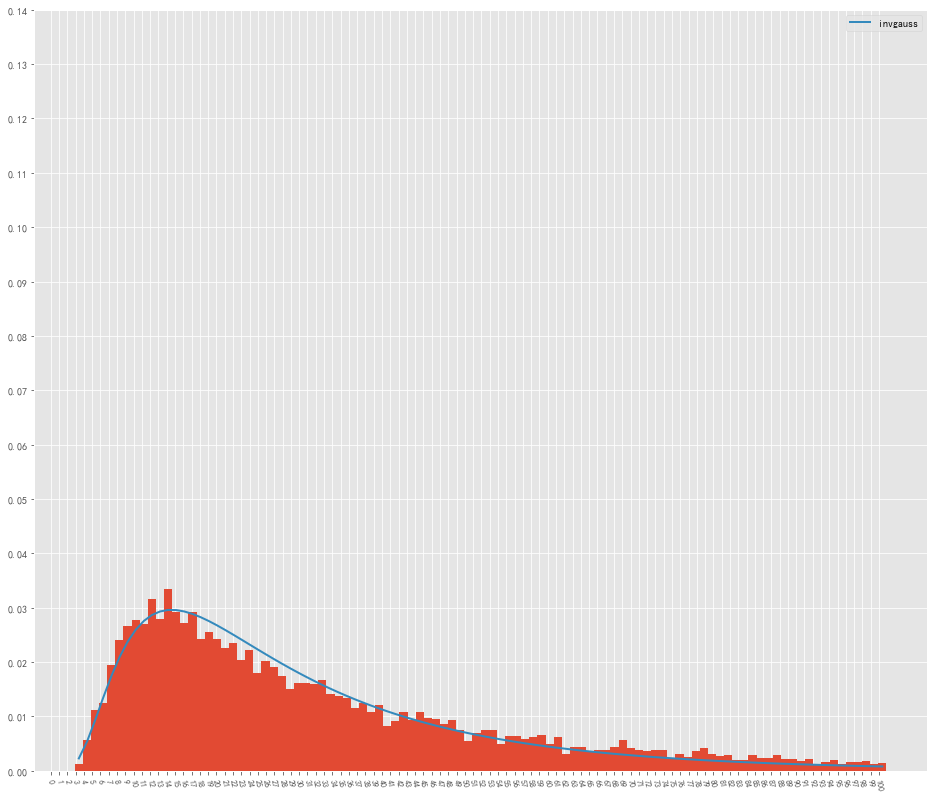

In [34]:
# 逆高斯连续随机变量。
from scipy.stats import invgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mu = 0.3
mu, loc, scale = 0.4856500576494863, 0.5128946812111822, 41.435767191284285
# mu, loc, scale = 0.48, 8, 50  

# mu, loc, scale = 3,0.3,30  #2.9调整 min2 max 3000以上

#mu, loc, scale = 2,1,25  #2.9调整 min2 max 3000以上

#mu, loc, scale = 0.5,5,260 #2.9调整 min2 max 3000以上

# mean, var, skew, kurt = invgauss.stats(mu, moments='mvsk')
mu, loc, scale = 0.9, 0.5, 41

# mu, loc, scale = 0.7, 1, 60         #  xyz.be.customer
# mu, loc, scale = 3, 0.3, 30
# mu, loc, scale = 0.5, 0.1, 20         #  888

# x = np.linspace(invgauss.ppf(0.01, mu),
#                 100 * invgauss.ppf(0.99, mu), 100)
# ax.plot(x, invgauss.pdf(x, mu, loc=loc, scale=scale),
#        'r-', lw=5, alpha=0.6, label='invgauss pdf')

# ax.legend(loc='best', frameon=False)
# plt.show()

datas = invgauss.rvs( mu, loc=loc, scale=scale, size = 10000)
f = Fitter(datas, xmin=-2, xmax=101, distributions=['invgauss'], bins=100)
f.fit()

print("*" * 24)
print(f.get_best())
f.hist()
f.plot_pdf()
plt.xticks([int(_x) for _x in range(0, 101, 1)], rotation=280, size=8)
plt.yticks([_y/100 for _y in range(0, 15, 1)], size=10)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
print(pd.Series(datas).describe())


plt.show()

Fitting 1 distributions: 100%|███████████████████████████████████████████████████████████| 1/1 [00:16<00:00, 16.15s/it]


              sumsquare_error          aic            bic  kl_div  \
norminvgauss         0.000012  1440.693896 -205136.921789     inf   

              ks_statistic  ks_pvalue  
norminvgauss      0.013342   0.056371  
{'norminvgauss': (14.583857481156898, 13.428692068975375, -0.3581307343336848, 47.297840212314355)}
************************
{'norminvgauss': {'a': 14.583857481156898, 'b': 13.428692068975375, 'loc': -0.3581307343336848, 'scale': 47.297840212314355}}
count    10000.000000
mean       111.296973
std         49.656193
min         20.114144
25%         74.673640
50%        103.657987
75%        139.649791
max        384.322188
dtype: float64


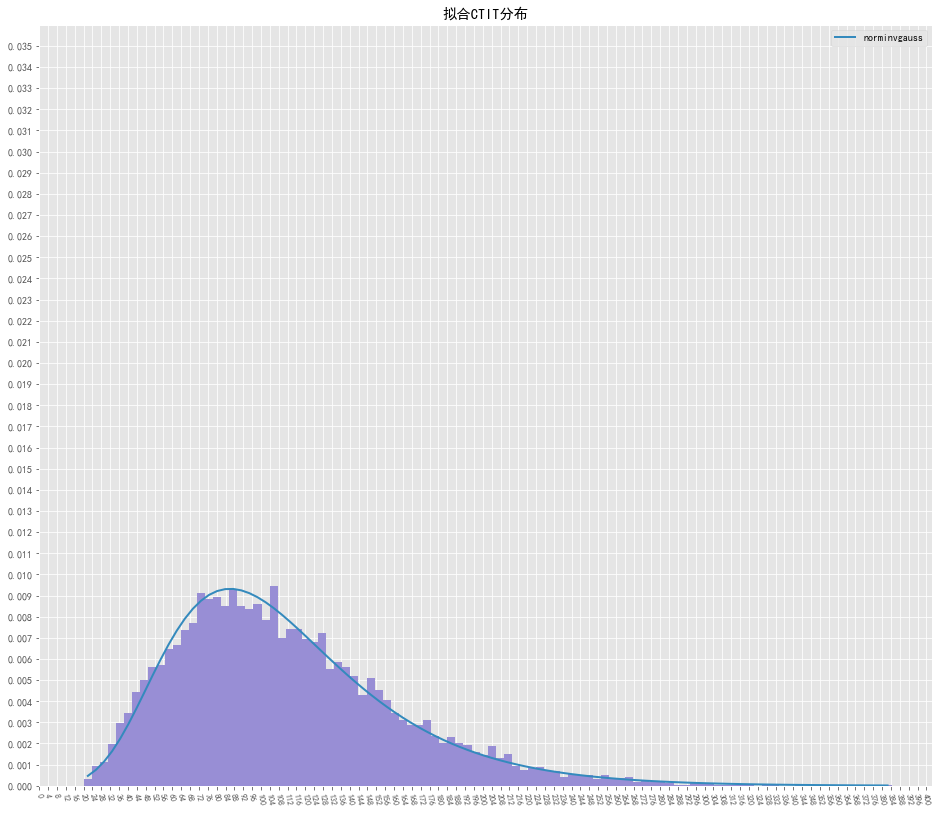

In [474]:
# 广义逆高斯连续随机变量。
from scipy.stats import geninvgauss, skewnorm, johnsonsb, gengamma, exponweib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

# geninvgauss
# p, b = 0.8, 3
# p, b, loc, scale = 100, 1.2, 8, 10
# datas = geninvgauss.rvs(p, b, loc=loc, scale=scale, size=10000)

# skewnorm
a, loc, scale = 10, 10, 100
datas = skewnorm.rvs(a, loc=loc, scale=scale, size=10000)

# johnsonsb
a, b, loc, scale = 0.8110977849235455, 1.1577502178296588, 13.40794712495521, 278.07421922934674
datas = johnsonsb.rvs(a, b, loc=loc, scale=scale, size=10000)

# gengamma
a, b, loc, scale = 2.6360311719353096, 1.203193273182801, 13.70509773712238, 44.62792773620802
datas = gengamma.rvs(a, b, loc=loc, scale=scale, size=10000)

# exponweib
# a, b, loc, scale = 1.875068311372476, 1.473413779136615, 14.911281310038174, 80.29864448201769
# datas = exponweib.rvs(a, b, loc=loc, scale=scale, size=10000)



# f = Fitter(datas, xmin=-1, xmax=51, distributions=['lognorm', 'norminvgauss'], bins=50)
f = Fitter(datas, xmin=-1, xmax=401, distributions=[ 'norminvgauss'], bins=100)
f.fit()

print(f.summary())
print(f.fitted_param)
# print(f.fitted_pdf)
print("*" * 24)
print(f.get_best())
f.hist()

# plt.ylim(0, 0.2)
# plt.xticks([int(_x) for _x in range(0,51, 1)], rotation=280, size=8)
# plt.yticks([_y/100 for _y in range(0, 21, 1)], size=10)

plt.ylim(0, 0.036)
plt.xticks([int(_x) for _x in range(0,401, 4)], rotation=280, size=8)
plt.yticks([_y/1000 for _y in range(0, 36, 1)], size=10)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
plt.title('拟合CTIT分布')
print(pd.Series(datas).describe())

plt.show()

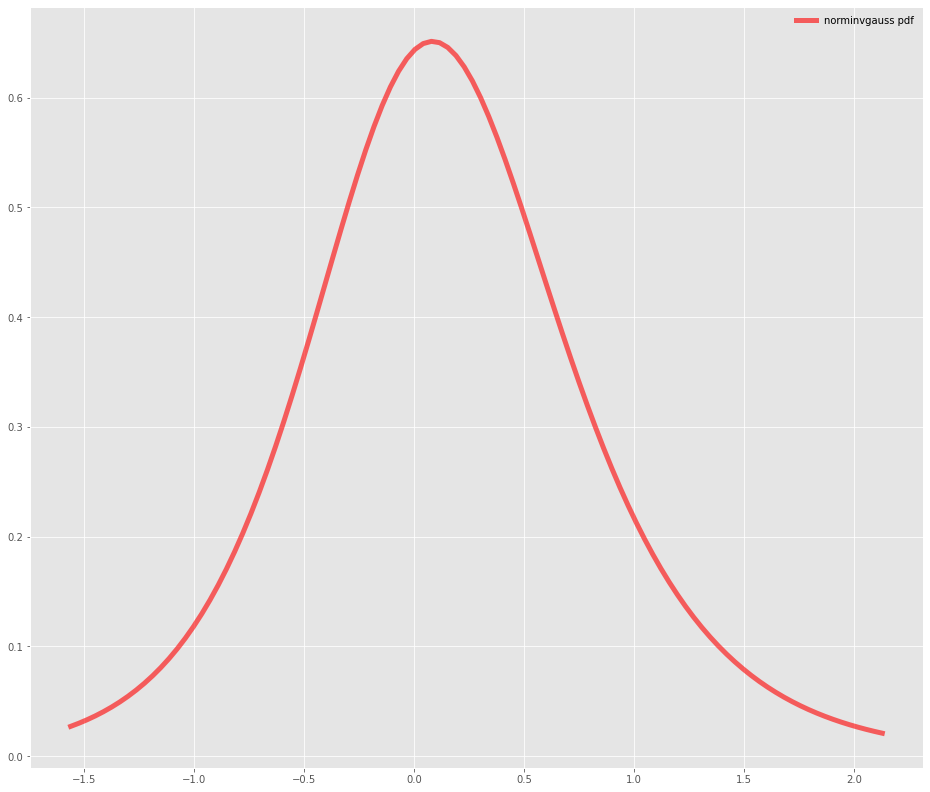

In [92]:
# 正态逆高斯连续随机变量。

from scipy.stats import norminvgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

a, b = 2,0.3
mean, var, skew, kurt = norminvgauss.stats(a, b, moments='mvsk')

x = np.linspace(norminvgauss.ppf(0.01, a, b),
                norminvgauss.ppf(0.99, a, b), 100)
ax.plot(x, norminvgauss.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='norminvgauss pdf')

ax.legend(loc='best', frameon=False)
plt.show()

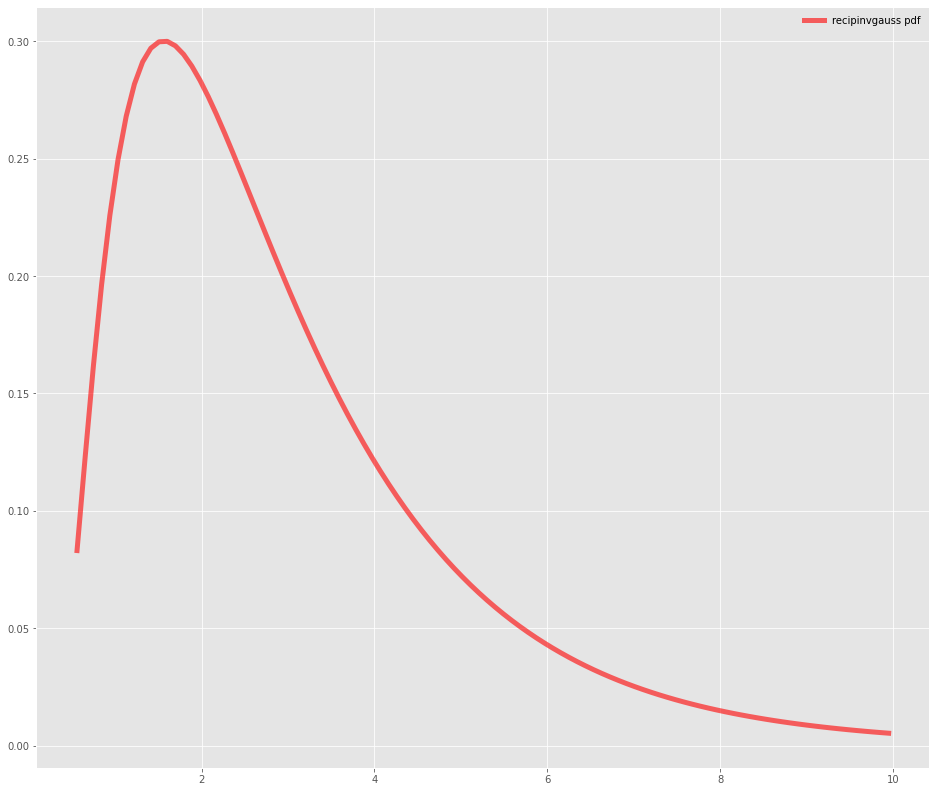

In [96]:
# 倒数逆高斯连续随机变量

from scipy.stats import recipinvgauss
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mu = 0.5
mean, var, skew, kurt = recipinvgauss.stats(mu, moments='mvsk')

x = np.linspace(recipinvgauss.ppf(0.01, mu),
                recipinvgauss.ppf(0.99, mu), 100)
ax.plot(x, recipinvgauss.pdf(x, mu),
       'r-', lw=5, alpha=0.6, label='recipinvgauss pdf')

ax.legend(loc='best', frameon=False)
plt.show()

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.55it/s]


************************
{'invweibull': {'c': 3.0068906306898606, 'loc': -3.489188086418652, 'scale': 8.40078166888297}}
count    10000.000000
mean         8.080523
std          8.307681
min          0.500246
25%          4.034057
50%          5.970231
75%          9.443153
max        301.336364
dtype: float64


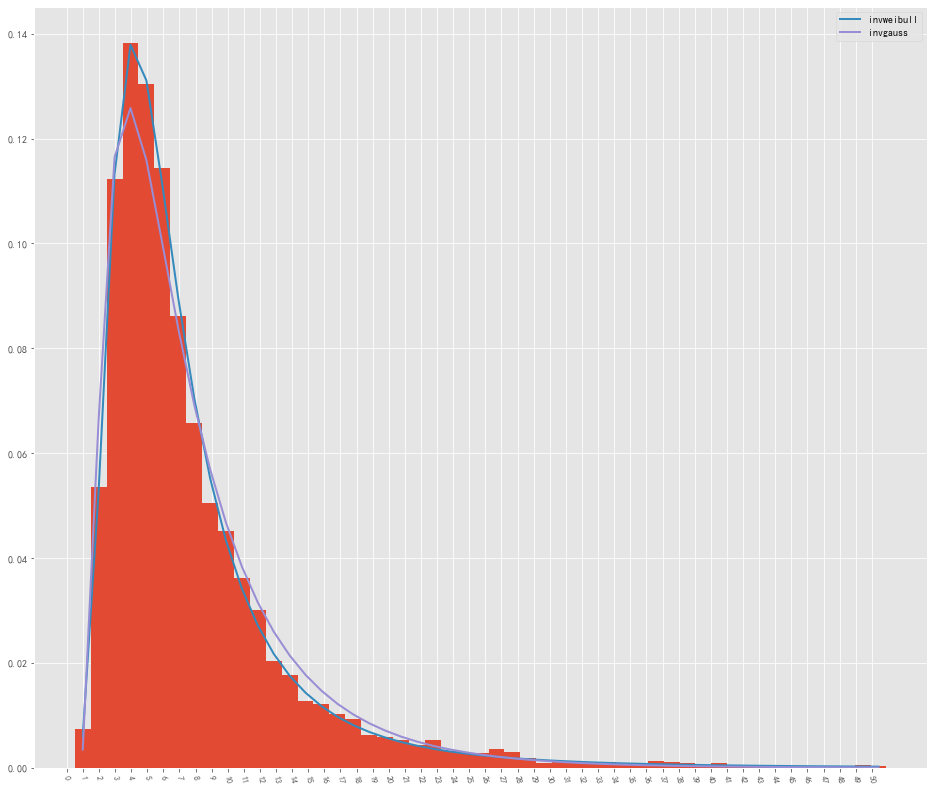

In [60]:
# 倒置的威布尔连续随机变量

from scipy.stats import invweibull
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = 10.6
c, loc, scale = 2.7307419497972623, -2.818931030777464,7.697163630444702
# mean, var, skew, kurt = invweibull.stats(c, moments='mvsk')

# x = np.linspace(invweibull.ppf(0.01, c),
#                 invweibull.ppf(0.99, c), 100)
# ax.plot(x, invweibull.pdf(x, c),
#        'r-', lw=5, alpha=0.6, label='invweibull pdf')

# ax.legend(loc='best', frameon=False)
# plt.show()


datas = invweibull.rvs(c, loc=loc, scale=scale, size = 10000)
f = Fitter(datas, xmin=-2, xmax=51, distributions=['invweibull', 'invgauss'], bins=51)
f.fit()

print("*" * 24)
print(f.get_best())
f.hist()
f.plot_pdf()
plt.xticks([int(_x) for _x in range(0, 51, 1)], rotation=280, size=8)
# plt.yticks([_y/100 for _y in range(0, 1, 1)], size=10)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
print(pd.Series(datas).describe())



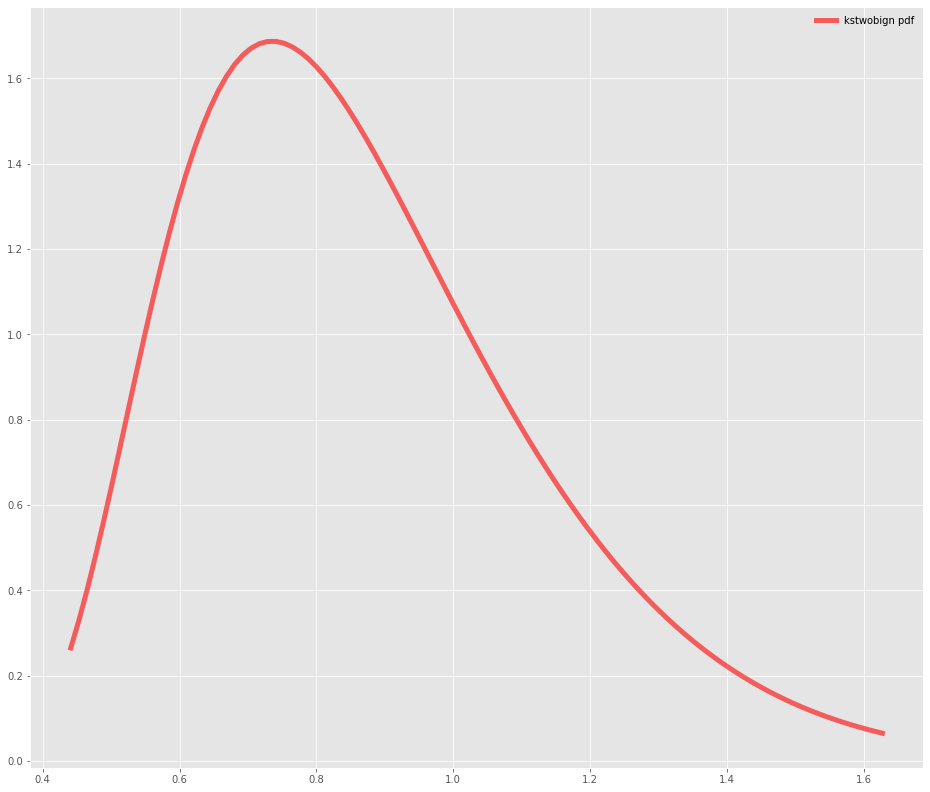

In [98]:
# 刻度Kolmogorov-Smirnov双侧检验统计量的极限分布。

from scipy.stats import kstwobign
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = kstwobign.stats(moments='mvsk')

x = np.linspace(kstwobign.ppf(0.01),
                kstwobign.ppf(0.99), 100)
ax.plot(x, kstwobign.pdf(x),
       'r-', lw=5, alpha=0.6, label='kstwobign pdf')
ax.legend(loc='best', frameon=False)
plt.show()

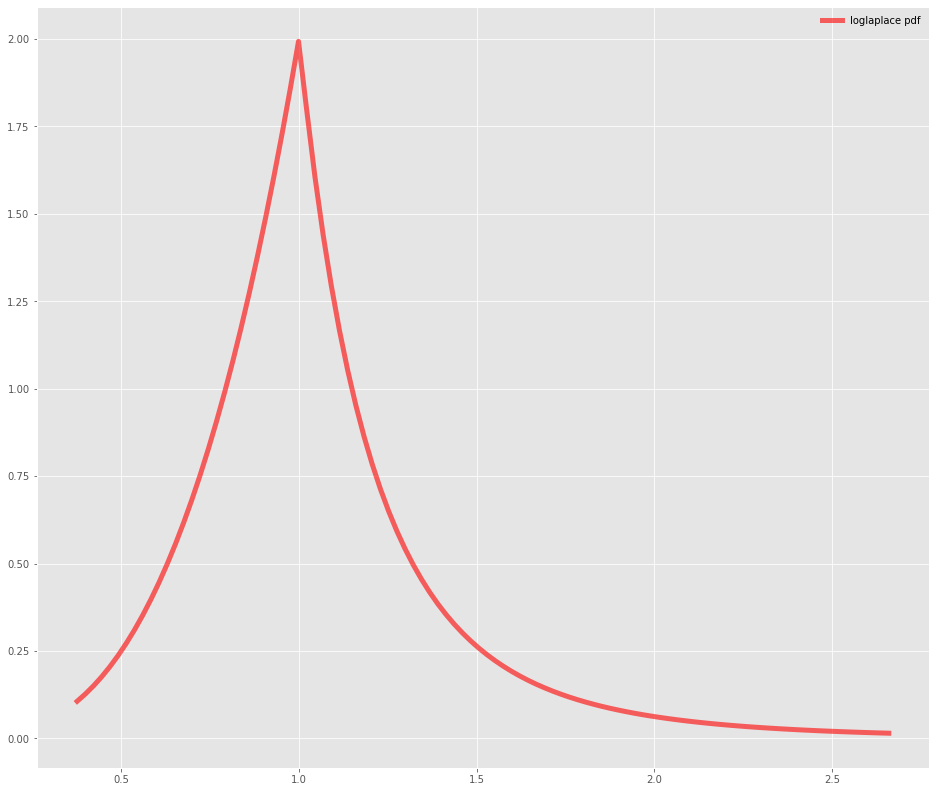

In [102]:
# 对数拉普拉斯连续型随机变量。

from scipy.stats import loglaplace
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = 4
mean, var, skew, kurt = loglaplace.stats(c, moments='mvsk')


x = np.linspace(loglaplace.ppf(0.01, c),
                loglaplace.ppf(0.99, c), 100)
ax.plot(x, loglaplace.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='loglaplace pdf')

ax.legend(loc='best', frameon=False)
plt.show()

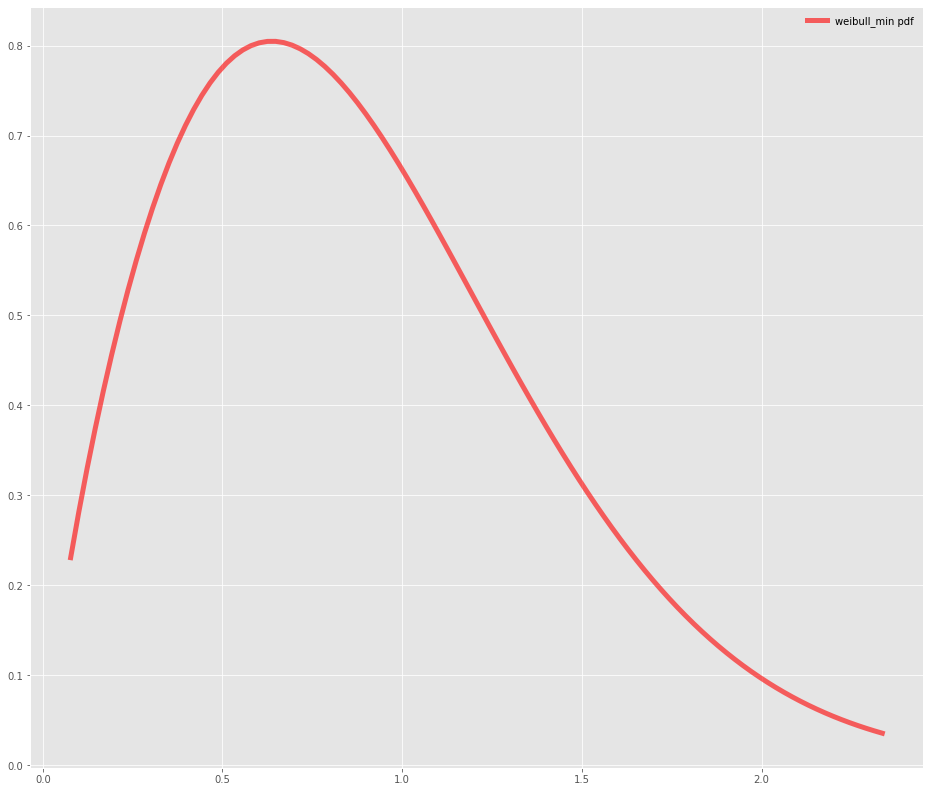

In [106]:
# 威布尔最小连续随机变量。

from scipy.stats import weibull_min
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = 1.8
mean, var, skew, kurt = weibull_min.stats(c, moments='mvsk')

x = np.linspace(weibull_min.ppf(0.01, c),
                weibull_min.ppf(0.99, c), 100)
ax.plot(x, weibull_min.pdf(x, c),
       'r-', lw=5, alpha=0.6, label='weibull_min pdf')

ax.legend(loc='best', frameon=False)
plt.show()

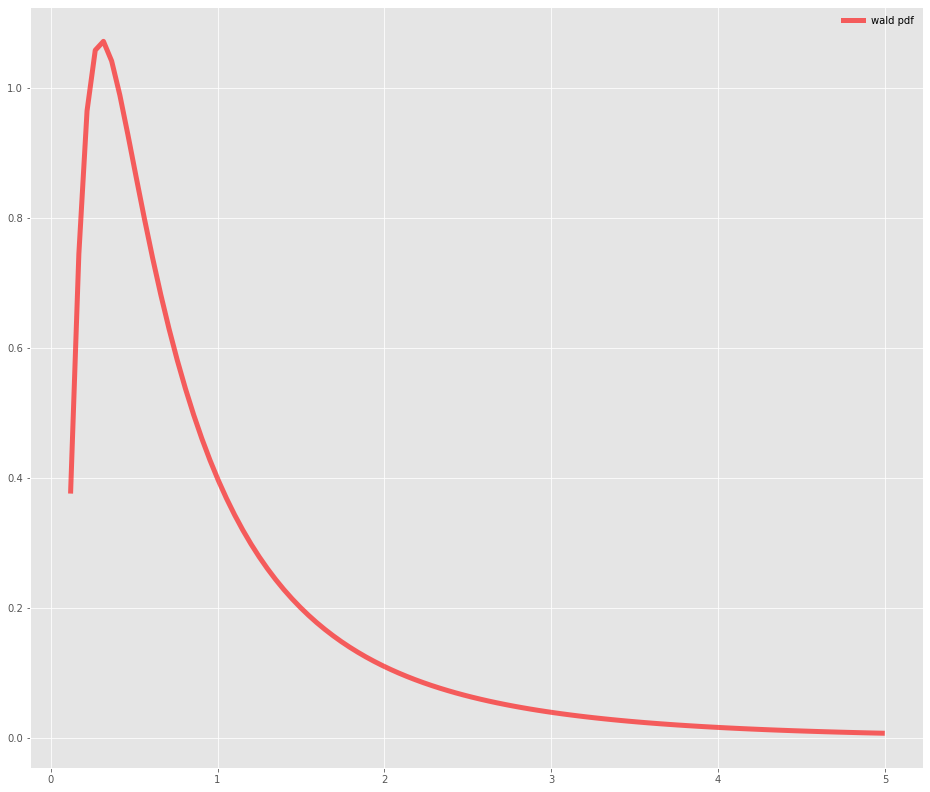

In [107]:
# 沃尔德连续随机变量。
from scipy.stats import wald
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = wald.stats(moments='mvsk')

x = np.linspace(wald.ppf(0.01),
                wald.ppf(0.99), 100)
ax.plot(x, wald.pdf(x),
       'r-', lw=5, alpha=0.6, label='wald pdf')

ax.legend(loc='best', frameon=False)
plt.show()

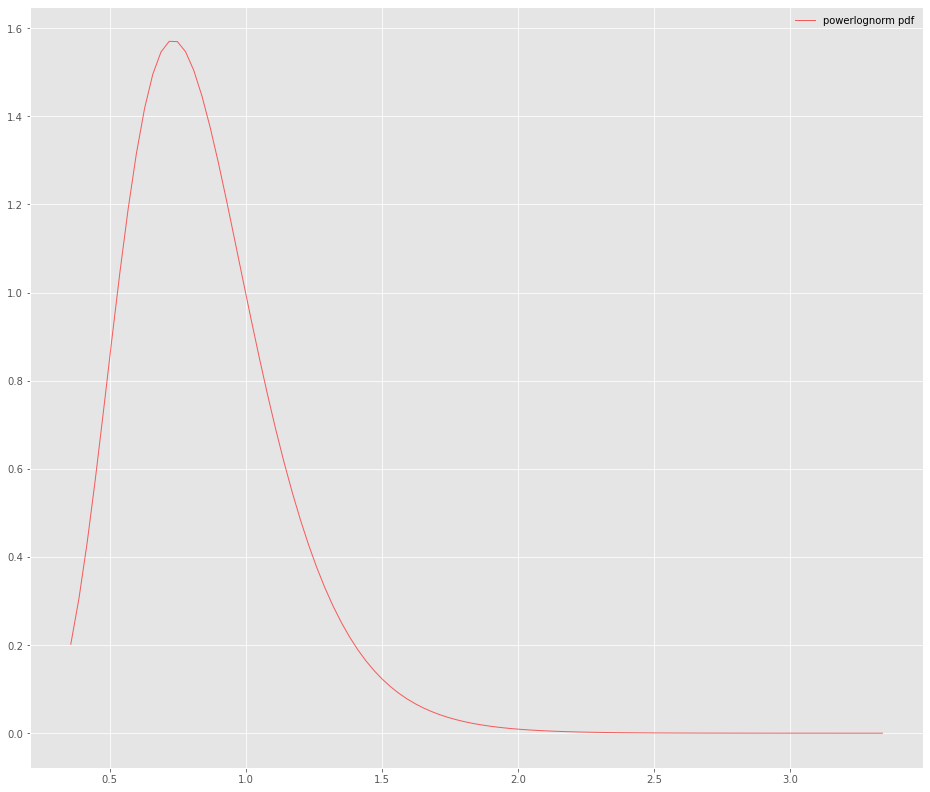

In [65]:
# 幂对数正态连续随机变量。

from scipy.stats import powerlognorm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c, s = 2, 0.4
mean, var, skew, kurt = powerlognorm.stats(c, s, moments='mvsk')

x = np.linspace(powerlognorm.ppf(0.01, c, s),
                2* powerlognorm.ppf(0.99, c, s), 100)
ax.plot(x, powerlognorm.pdf(x, c, s),
       'r-', lw=1, alpha=0.6, label='powerlognorm pdf')

ax.legend(loc='best', frameon=False)
plt.show()

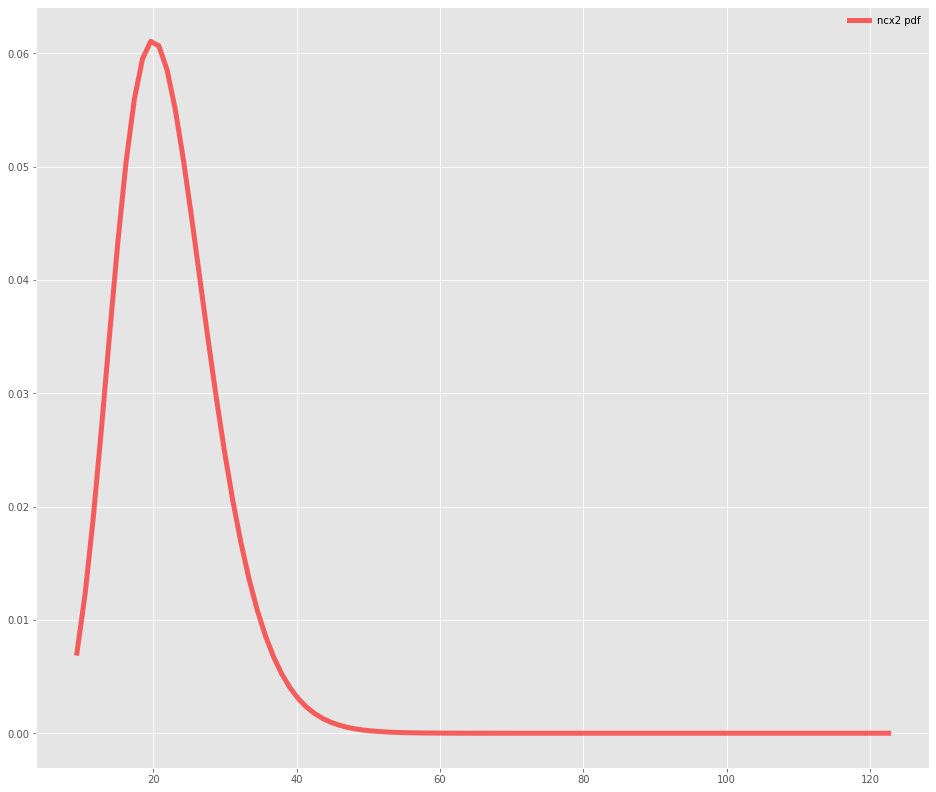

In [129]:
# 非中心卡方连续型随机变量。
from scipy.stats import ncx2
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

df, nc = 21, 1.06
mean, var, skew, kurt = ncx2.stats(df, nc, moments='mvsk')

x = np.linspace(ncx2.ppf(0.01, df, nc),
               3 * ncx2.ppf(0.99, df, nc), 100)
ax.plot(x, ncx2.pdf(x, df, nc),
       'r-', lw=5, alpha=0.6, label='ncx2 pdf')

ax.legend(loc='best', frameon=False)
plt.show()

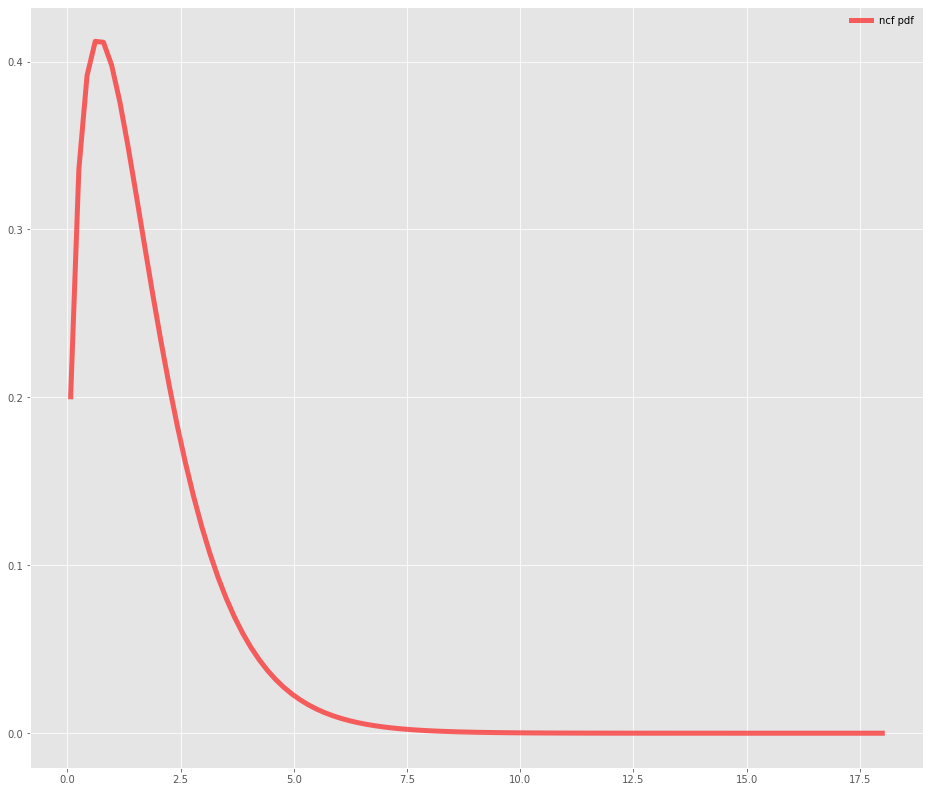

In [138]:
# 非中心F分布连续型随机变量。
from scipy.stats import ncf
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

dfn, dfd, nc = 3, 120,2
mean, var, skew, kurt = ncf.stats(dfn, dfd, nc, moments='mvsk')

x = np.linspace(ncf.ppf(0.01, dfn, dfd, nc),
                3 *  ncf.ppf(0.99, dfn, dfd, nc), 100)
ax.plot(x, ncf.pdf(x, dfn, dfd, nc),
       'r-', lw=5, alpha=0.6, label='ncf pdf')

ax.legend(loc='best', frameon=False)
plt.show()

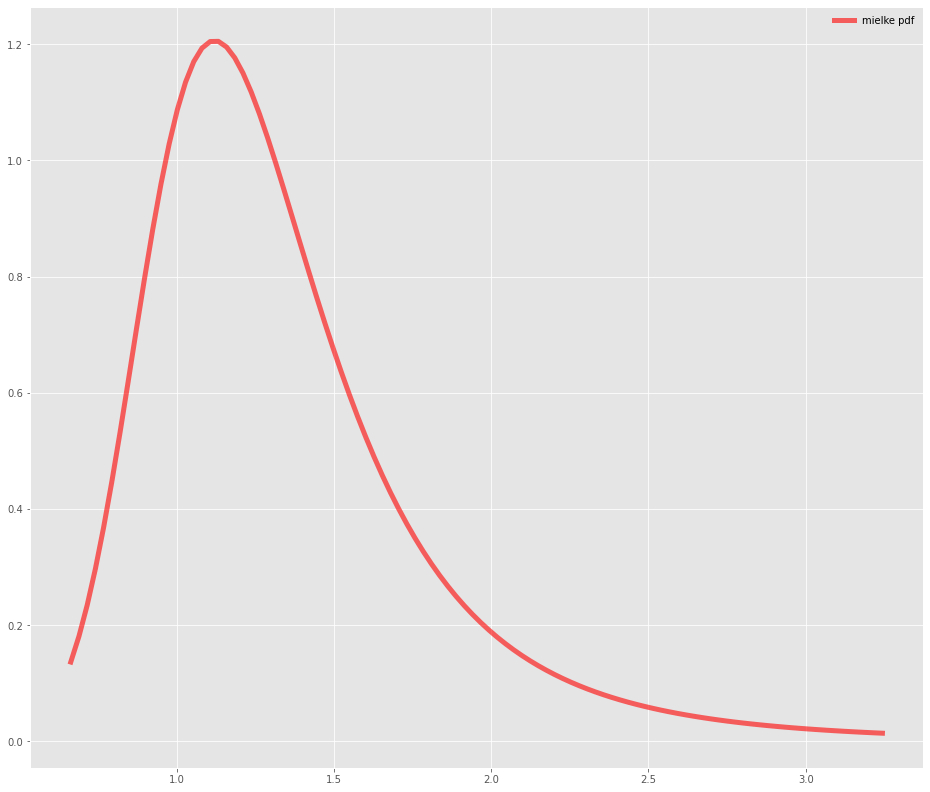

In [116]:
# 一个Mielke Beta-Kappa/Dagum连续随机变量。

from scipy.stats import mielke
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

k, s = 10.4, 4.6
mean, var, skew, kurt = mielke.stats(k, s, moments='mvsk')

x = np.linspace(mielke.ppf(0.01, k, s),
                mielke.ppf(0.99, k, s), 100)
ax.plot(x, mielke.pdf(x, k, s),
       'r-', lw=5, alpha=0.6, label='mielke pdf')

ax.legend(loc='best', frameon=False)
plt.show()

Fitting 2 distributions: 100%|███████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.09it/s]


{'lognorm': {'s': 0.8739055608350579, 'loc': 4.287283747755508, 'scale': 90.73659057432596}}
count    10000.000000
mean       140.396158
std        148.470180
min          9.357619
25%         54.485536
50%         94.968508
75%        170.289760
max       2946.704481
dtype: float64
*********************
[290.81137232 488.01166427 101.26131194 ... 217.50438228  34.45671949
  53.90043748]
9963


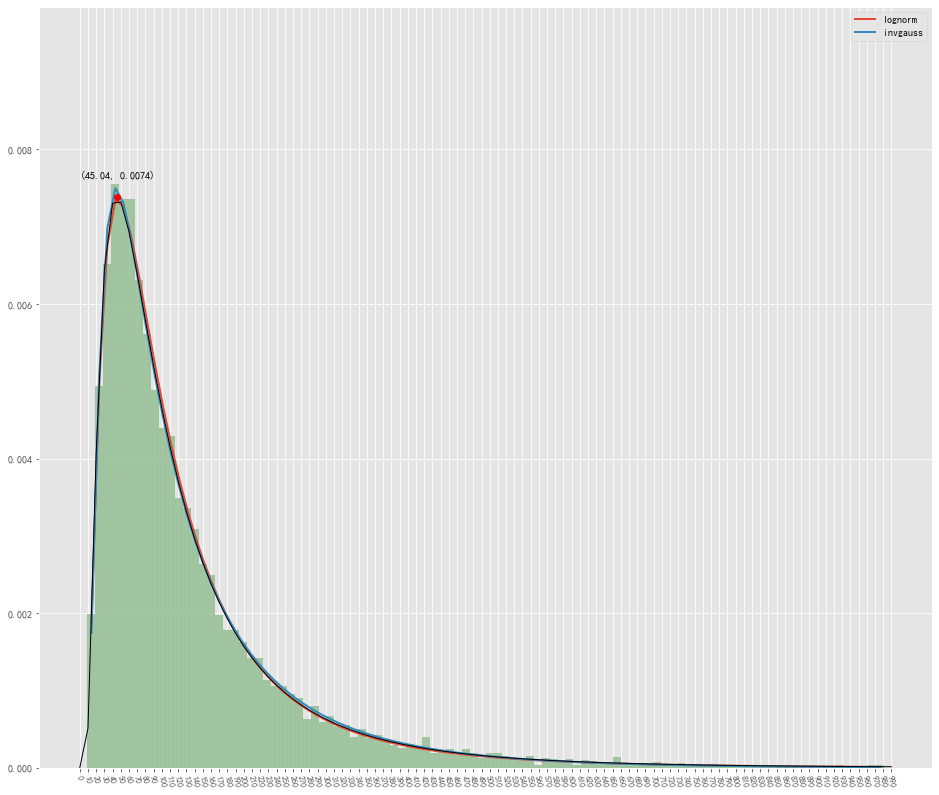

In [41]:
# 对数正态连续随机变量。

from scipy.stats import lognorm
import matplotlib.pyplot as plt
from fitter import Fitter
import pandas as pd
from scipy.stats import chi2
from scipy.optimize import minimize_scalar

# print(matplotlib.version)

# s, loc, scale = 0.9521372123314837, 31.615794107171943, 189.53264931243058
# mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')

# fig, ax = plt.subplots(1, 1)
# x = np.linspace(0,2, 100)
# # # s, loc, scale = 4.254351041552599, 1.7283893605279232, 2.3241782062406915
# # s, loc, scale = 0.549, -1.012, 32   # 4.359
# # s, loc, scale =0.98, 10, 0# 4.359
# s, loc, scale = 0.952, 31.616, 189.533
# ax.plot(x, lognorm.pdf(x, s, loc=0.2),  'r-', lw=5, alpha=0.6, label='lognorm pdf')
# # # ax.plot(x, lognorm.pdf(x, 0.95, loc=0.4),  'g-', lw=5, alpha=0.6, label='lognorm pdf')
# # # ax.plot(x, lognorm.pdf(x, 0.3),  'c-', lw=5, alpha=0.6, label='lognorm pdf')
# # ax.plot(x, lognorm.pdf(x, 0.95),  'y-', lw=5, alpha=0.6, label='lognorm pdf')
# ax.legend(loc='best', frameon=False)


s, loc, scale = 0.95, 10, 0
s, loc, scale = 0.952, 31.616, 189.533


# # 点击 到 安装

# # r888
# s, loc, scale = 0.5462399635283319, 6.327149254424501, 69.61662367689756   # r888  384   峰值  60-66   密度 0.012
# s, loc, scale = 0.9, 0, 60             # r888  384   峰值 30-36  密度 0.011
# s, loc, scale = 0.7, 0, 60            # r888  384   峰值 40  密度 0.012   12月26日~1月2日 时间戳
# s, loc, scale = 0.6, 0, 80            # r888  384  2023-01-17 调   峰值 56   密度 0.01

s, loc, scale = 0.6, 5, 55           # 2023-01-28调  峰值 50  密度   最小   最大       测试起止：
s, loc, scale = 0.9, 5, 90  
# s, loc, scale = 0.8, 3, 60  #0.011-0.012 峰值 34 min6 max 1200以上
# s, loc, scale = 0.65, 3, 60  

# s, loc, scale = 0.9, 8, 110  
# # r888sport
# s, loc, scale = 0.5462399635283319, 6.327149254424501, 69.61662367689756   # r888  384
# s, loc, scale = 0.7, 0, 60          # 峰值 40  -> 14天，时间撮
# s, loc, scale = 0.6, 0, 90          # 2023-01-04 峰值 66
# s, loc, scale = 0.45, -10, 75       # r888sport  384  2023-01-13 峰值 50（0.014）


# # Mb bank              97Mb   VN
# s, loc, scale = 0.96, 1, 9
# s, loc, scale = 0.5824422192778205, 3.037957417378336, 99.2450011222519    # MB Bank   384拟合
# s, loc, scale = 0.5, 10, 110        # MB Bank  峰值92 - 100
# s, loc, scale = 0.45, 0, 110        # MB Bank  峰值80 - 84  384渠道曲线

# s, loc, scale = 0.45, 0, 100        # 峰值 78~81  384渠道曲线
# s, loc, scale = 0.44, 0, 96         # 峰值 81  384渠道曲线
# s, loc, scale = 0.5, 10, 110        # 峰值92 - 100  384渠道曲线
# s, loc, scale = 0.9, 10, 100        # 峰值 56-60  0.007  本地5271667:12.22-1.22    线上 1.13-1.26（2.21-2.22时间戳  已时间戳两个 是否能重复用存疑）

# s, loc, scale = 0.8, 0, 110           # 2023-01-28调  峰值 60-66  0.0064   1天时间戳
#s, loc, scale = 0.55, 0, 110          # 2023-01-28调  峰值 80-86  0.0077   1天时间戳
# s, loc, scale = 0.5370850002485996, -16.925457486092, 140.16312792361168  # 384
#s, loc, scale = 0.6, 3, 130         # 2023-01-31调  峰值 100  0.0063  时间戳 1天
# s, loc, scale = 0.8, 10, 150        # 2023-01-31调  峰值 89  0.004-0.005 min 19  时间戳 4天  可以考虑循环用

#s, loc, scale = 0.75, 12, 110  #2023-02-06调  峰值 75  0.007-0.008 mix 15  时间戳 1天
#s, loc, scale = 0.85, 12, 120  #2023-02-15调  峰值 70  0.006 min 15 2天时间戳 max 2000以上

#s, loc, scale = 0.55, 12, 82  #2023-02-15调  峰值 75  0.01-0.011 min 19  没用

# s, loc, scale = 0.9, 16, 170  #2023-02-15调  峰值 92  0.004-0.005 min 17 max 6000以上
# 
#s, loc, scale = 0.9, 13, 145  #2023-02-17调  峰值 77 0.005 min 16 max 3000以上

# s, loc, scale = 0.9, 12, 120  #2023-02-23调  峰值 65 0.005-0.006 min 14 max 3000以上  时间戳

# s, loc, scale = 0.9, 12, 200  #2023-02-23调  峰值 100 0.003-0.004 min 17 max 5000以上  


# # Truebanlance
# s, loc, scale = 1.6, 8, 110         # com.balancehero.truebalance  ctit
# s, loc, scale = 0.96, 0.15, 1.4
# s, loc, scale = 0.6, 0, 110         # 生成10000数据 最小 8  最大 966  峰值  78  -> 时间撮
# s, loc, scale = 0.9, 8, 110         # 生成10000数据 最小 11  最大 5821  峰值  65  -> 14天，时间戳
# s, loc, scale = 0.6, 8, 60          # 2023-01-04 调整   生成10000数据 最小 12  最大 700   峰值 50 0.0134  起止：2023.1.4 -> 20.23.1.22
# s, loc, scale = 0.95, 5, 80         # 2023-01-28调  最小 5.6  最大 4971  峰值 40-45  密度 0.0083  起止：2023-01-28 ->

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
# # com.ada.astrapay           32Mb   ID
# a, loc, scale = 1.620, 1.893, 49.491           # 峰值 40~50    pkg ~32MB
#s, loc, scale = 0.6, 0, 80                     # 峰值 50  0.01     min 4  max 1500           21天  时间戳
#s, loc, scale = 0.8, 5, 110                    # 峰值 66  0.0064   min 8  max 3000 (2.1日调)  1天时间戳

#s, loc, scale = 0.8, 5, 70                    # 峰值 45  0.0098   min 7  max 2400 (2.2日调)
#s, loc, scale = 0.58, 5, 85                    # 峰值 60-70  0.009-0.01   min 9  max 800以上  (2.6日调)
#s, loc, scale = 0.9, 5, 90                  # 峰值 45-50  0.007-0.008   min 6  max 3500以上  (2.8日调)
# s, loc, scale = 0.9, 8, 90    #3.15

# # mx.com.bancoazteca.bazdigitalmovil
# s, loc, scale = 0.90, 20, 170
# s, loc, scale = 0.90, 15, 140
# s, loc, scale = 0.95, 12, 180

# s, loc, scale = 0.55, 5, 130

# # com.bpi.ng.mobilebanking   67Mb   PH
#s, loc, scale = 0.8, 10, 150
#s, loc, scale = 0.9, 8, 100   #2.3调整 峰值50-60 密度0.07 最小值10左右 最大值3000以上 (2.3日调)

# # com.netway.phone.advice    65Mb   IN
# s, loc, scale = 0.85, 8, 160      # 峰值 72  0.0055  min 8   max 5600 


# # com.linkdokter.halodoc.android  48Mb  ID
# s, loc, scale = 0.8, 15, 160           # 峰值 100-105  0.0048   min 19  max 5300 (2.1日调)
#s, loc, scale = 0.9, 8, 100    #2.3调整 峰值50-60 密度0.07 最小值10左右 最大值3000以上 (2.3日调)

# # vn.com.techcombank.bb.app   62Mb  VN
#s, loc, scale = 0.85, 8, 145          # 峰值 75-80 0.005   min 11  max 5200
#s, loc, scale = 0.8, 8, 145   #  2.3调整 峰值 70-90不定 0.005   min 11  max 4000以上(2.3日调)

# # com.naviapp                 65Mb  IN
# s, loc, scale = 0.8, 6, 100         # 峰值 60  0.0072   min 8   max 2600    1.5天 时间戳
#s, loc, scale = 0.85, 8, 160        # 峰值 80  0.005    min 11  max 6000
# s, loc, scale = 0.9, 10, 160

# # com.zeptoconsumerapp        29Mb  IN
#s, loc, scale = 0.95, 3, 120        # 峰值 60  0.006    min 5   max 7000    1.5天 时间戳
#s, loc, scale = 0.95, 5, 80         # 2023-01-28调  最小 5.6  最大 4971  峰值 40-45  密度 0.0083  起止：2023-01-28 ->
#s, loc, scale = 0.6, 5, 75         # 2023-02-10调  最小 9  最大 600以上  峰值 45  密度 0.011 

# # com.kreditbee.android      17Mb  IN
#s, loc, scale = 0.9, 6, 60          # 峰值 35  0.0113  min 7   max 3000 (2.3日调)

# # naukriApp.appModules.login 14Mb  IN
# s, loc, scale = 0.8, 0, 90           # 峰值 35  0.0113   min 7   max 3000 (2.3日调)

# # com.zvooq.openplay         23Mb   RU
# s, loc, scale = 0.9, 8, 70        # 峰值 35-40 0.0095     min 10   max 3500 (2.3日调)

# # com.asf.singa              21Mb    ID   P360_lite
# s, loc, scale = 0.95, 5, 120         # 峰值 55  0.006     min 7   max 5800 (2.1日调)
# s, loc, scale = 0.85, 5, 55          # 峰值 30-40 0.013   min 7   max 2000 (2.3日调)

# # com.my11circle.android     10Mb    IN
# s, loc, scale = 0.75, 8, 120         # 峰值 77 0.0062     min 13  max 3200 (2.1日调)
# s, loc, scale = 0.8, 5, 40           # 峰值 25 0.017      min 6   max 1000 (2.3日调)

# # com.showtimeapp            115Mb IN
# s, loc, scale = 0.8,10, 180         # 峰值 110 0.0044     min 17  max 6000 (2.2日调)

# # br.com.Inter.CDPro         165MB BR  # 巴西
# s, loc, scale = 0.8, 20, 260         # 峰值 >140 0.0035    min 27  max 7000 (2.3日调)

# # com.niyo.equitassavingsaccount":            # 102Mb  IN
#s, loc, scale = 0.85, 6, 170         # 峰值 85  0.004-0.005  min 8    (2.3日调)
#s, loc, scale = 0.7, 10, 100         # 峰值 70-75  0.007-0.008  min 14    (2.6日调)
#s, loc, scale = 0.8, 13, 140        # 峰值 80-90  0.005-0.006  min 17 max 5000以上    (2.6日调)



# # com.tpb.mb.gprsandroid":                    # 154Mb  TH/VN
#s, loc, scale = 0.8, 10, 190         # 峰值 110  0.004  min 17    (2.3日调)

# # com.exness.android.pa":                     # 15Mb  TH/VN
#s, loc, scale = 0.8, 5, 40        # 峰值 25 0.017    min 6  max 1000左右 (2.3日调)  2天时间戳
#s, loc, scale = 0.9, 7, 90 ## 峰值 45 0.007-0.008    min 10  max 3500以上(2.6日调) 1天时间戳

#s, loc, scale = 0.6, 3, 42  ## 峰值 35 0.019-0.020    min 6  max 400以上(2.10日调)  1周时间戳
#s, loc, scale = 0.8, 5, 50 ## 峰值 35 0.013-0.014    min 6  max1000以上(2.10日调)
# s, loc, scale = 0.9, 5, 60


# # com.onlinebankaccount.zerobalanceaccount     2M IN
#s, loc, scale = 0.6, 3, 25       # 峰值 20  0.032   min 4.6   max 313    (2.6日调)

# # com.niyo.sbm":                              # 46Mb  IN
#s, loc, scale = 0.9, 8, 95       # 峰值 50-60 0.007-0.008    min 9  max 5000 (2.3日调)

# # com.okinc.okex.gp":                         # 222Mb  kr
# s, loc, scale = 0.55, 5, 160       # 峰值 120-130 0.005-0.006    min 19  max 2000左右 (2.3日调)
# s, loc, scale = 0.6, 5, 100   ##KR 韩国  峰值 70-80  0.008 min16  3.15
# s, loc, scale = 0.9, 20, 170  #ru 3.15

# # au.com.bluebet":                         # 43Mb  au
#s, loc, scale = 0.58, 5, 70       # 峰值 55 0.011-0.012    min 10  max 900左右 (2.3日调)
#s, loc, scale = 0.87, 5, 105       # 峰值 50-55 0.007   min 7  (2.3日调)  两个都试一下


#com.woowahan.vn.baemin   61MB
#s, loc, scale = 0.6, 5, 95       # 峰值 67-75 0.008--0.009   min 10  max 1000以上  (2.8日调) 时间戳
#s, loc, scale = 0.9, 13, 105       # 峰值 65 0.006--0.007   min 15  max 4000以上  (2.14日调) 时间戳
# s, loc, scale = 0.9, 15, 160   # 峰值 86 0.004--0.005   min 19  max 6000以上  (3.10日调)  时间戳
# s, loc, scale = 0.9, 10, 140   # 峰值 72 0.004--0.005   min 14  max 3000以上  (3.10日调)  时间戳
# s, loc, scale = 0.75, 3, 140   # 峰值 82 0.005--0.006   min 8  max 2000以上  (3.22日调) 
# s, loc, scale = 0.9, 5, 110   # 峰值 53 0.006--0.007   min 8  max 2500以上  (3.22日调) 

#com.rynatsa.xtrendspeed   80MB
#s, loc, scale = 0.6, 5, 85       # 峰值 60-70 0.009--0.01   min 11  max 800以上  (2.15日调)

# com.privalia.mex 22mb
# s, loc, scale = 0.9, 8, 85       # 峰值 45 0.008 min 10 max 2000以上

#com.betway.sports 31.56Mb  MX
# s, loc, scale = 0.9, 8, 85 
# s, loc, scale = 0.9, 12, 120 

#mx.com.procesar.aforemovil.nuevosura 45mb
# s, loc, scale = 0.9, 12, 95 
# s, loc, scale = 0.9, 12, 130 

#in.swiggy.android  50MB
# s, loc, scale = 0.9, 12, 125       # 峰值 67 0.005---0.006 min 16 max 3000以上  1天 时间戳
# s, loc, scale = 0.9, 12, 150   # 峰值 78 0.004---0.005 min 18 max 3000以上  

#com.iqoption    51Mb  BR
# s, loc, scale = 0.9, 12, 135  # 峰值 73 0.004---0.005 min 16 max 3000以上  3.10


# # 通用
# s, loc, scale = 0.8, 0, 150     # 通用 或 无 P360


# s, loc, scale = 3.9410495732049813, 1.9999996586150892, 69.088257371200313     # zoomcar  399   
# s, loc, scale = 0.55, 0, 90      # com.mbmobile  &  com.balancehero.truebalance


# # 随机留存次数
# s, loc, scale = 0.7, -1.5, 4  # 随机留存次数
# s, loc, scale = 0.7, -0.8, 4.0  # 随机留存
# s, loc, scale = 3.71412299119224, 9.999999023517372, 0.953879294173807
# s, loc, scale = 0.549, -1.012, 4.359
# # datas = lognorm.rvs(s, scale=1.5, size=1000) * 100
# datas = lognorm.rvs(s, loc=0.15, scale=1.4, size=26000)


# # 点击 到 下载     峰值 5~6
# s, loc, scale = 0.96, 1, 9  
# # s, loc, scale = 0.549, -1.012, 4.359
# datas = lognorm.rvs(s, scale=2, size=1000) * 6


# # 安装 到 启动   峰值~13
#s, loc, scale = 0.9, 2, 5         # r888  384  安装 到 打开
# s, loc, scale = 0.4, 0, 15         # r888  384  安装 到 打开   每隔6天调整


# s, loc, scale = 0.96, 1, 8
# s, loc, scale = 0.549, -1.012, 4.359
# s, loc, scale = 0.7, -0.8, 4.0  # 随机留存
# datas = lognorm.rvs(s, loc=loc, scale=scale, size=1000)
# print(datas)


# 随机事件
# s, loc, scale = 0.6, 0, 8
# datas = lognorm.rvs(s, loc=loc, scale=scale, size=1000)


# 电池电量
# s, loc, scale = 0.4, 0, 45
# datas = lognorm.rvs(s, loc=loc, scale=scale, size=1000)


# print('---' * 10)
# s0 = [i for i in datas if i < 1]
# s1 = [i for i in datas if 1 <= i < 2]
# s2 = [i for i in datas if 2 <= i < 3]
# s3 = [i for i in datas if 3 <= i < 4]
# s4 = [i for i in datas if 4 <= i < 5]
# print(s0)
# print(f"<1: {len(s0)} -- <2: {len(s1)} -- <3: {len(s2)} -- <4: {len(s3)} -- <5: {len(s4)}")



# 创建 lognorm 分布对象
dist = lognorm(s, loc=loc, scale=scale)

# 生成随机数据
datas = dist.rvs(size=10000)

# 定义概率密度函数
pdf = lambda x: dist.pdf(x)

# 使用 minimize_scalar 函数寻找概率密度函数的峰值点（众数）
bound_min = 0
bound_max = 1000    # 极值点的范围
res = minimize_scalar(lambda x: -pdf(x), bounds=(bound_min, bound_max), method='bounded')
mode_x = res.x
mode_y = pdf(mode_x)

# 使用fitter 拟合生成的随机数据验证模型
bins = 100                   # 直方图个数
f = Fitter(datas, xmin=-2, xmax=bound_max, distributions=['lognorm','invgauss' ], bins=bins)
f.fit()
# distributions=['lognorm','invgauss','norminvgauss','geninvgauss','alpha','']

# 获取最佳拟合参数
# print(f.fitted_param)
print(f.get_best())
print(pd.Series(datas).describe())
print("*" * 21)

# 画拟合数据的直方图
# f.hist(color='gray')
print(f._data)
print(len(f._data))
n, _bins, patches = plt.hist(f._data, bins=bins, density=True, color='#8FBC8F', alpha=0.8)

# 输出直方图的数据
# print(f"直方图的高度：{len(n)}\n", n)
# print(f"直方图的边界：{len(_bins)}\n", _bins)
# print(f"直方图的 Rectangle 对象：{len(patches)}\n", patches)

# 画拟合数据的概率密度分布图
f.plot_pdf(Nbest=5, lw=2, method="sumsquare_error")


# 坐标轴控制
y_max = mode_y + mode_y/3                                           # Y坐标：1.34倍的极值
plt.ylim(0, y_max)

xs = [int(_x) for _x in range(0,bound_max, bound_max // bins)]     # X坐标：0~极大值 
plt.xticks(xs, rotation=280, size=8)
# plt.yticks([_y/1000 for _y in range(0, 10, 1)], size=10)

# 绘制 极值点
plt.plot(mode_x, mode_y, 'ro')
plt.text(mode_x * 1.03, mode_y * 1.03, f'({mode_x:.2f}, {mode_y:.4f})', ha='center', va='bottom')
# plt.axhline(max_y, linestyle='--', color='gray', label=f'Maximum = {max_y:.2f}')

# 绘制原始参数的概率分布图
plt.plot(xs, pdf(xs), color="black", linewidth=1.0, linestyle="-")

# 添加中文支持
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号

plt.legend()
plt.show()

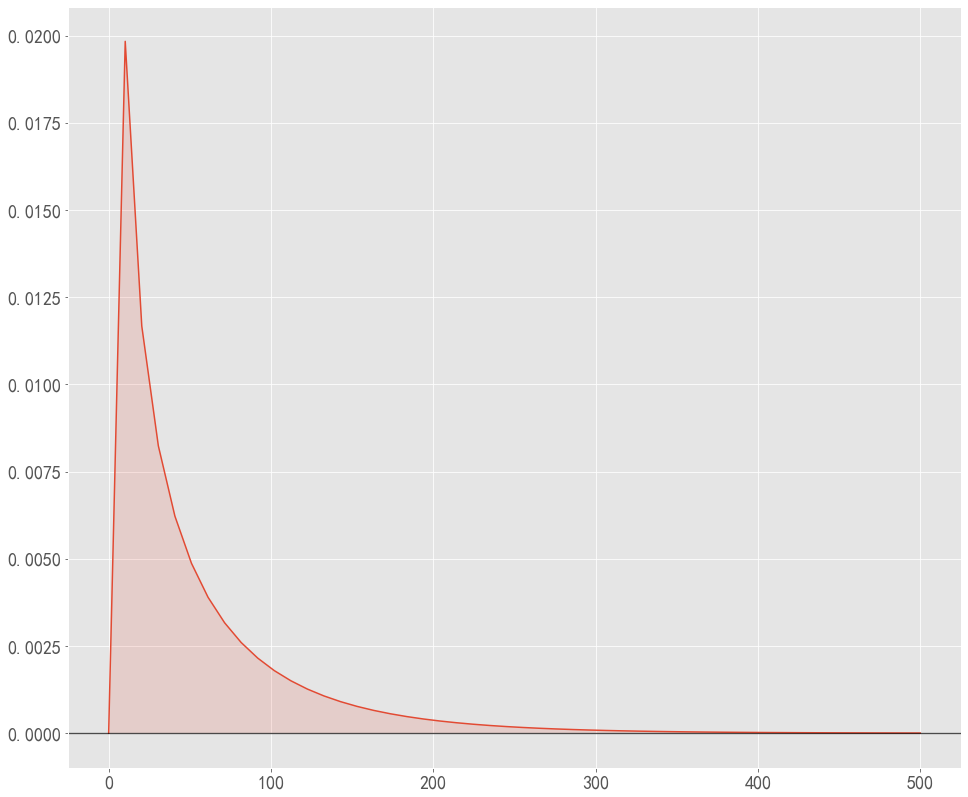

In [127]:
#卡方分布——画图
from scipy.stats import chi2
from matplotlib import style

# #PDF  概率密度函数
# plt.plot(np.linspace(0,20,100),chi2.pdf(np.linspace(0,20,100),df=4))#绘制0到20的卡方分布曲线,给定自由度为4
# plt.fill_between(np.linspace(0,20,100),chi2.pdf(np.linspace(0,20,100),df=4),alpha=0.15) #填充曲线

# #CDF 累积概率密度函数
# plt.plot(np.linspace(0,20,100),chi2.cdf(np.linspace(0,20,100),df=4)) #绘制累积概率密度函数

# #LEGEND 图例
# plt.text(x=11,y=0.25,s="pdf(normed)",alpha=0.75,weight="bold",color="#008fd5")
# plt.text(x=11,y=0.85,s="cdf",alpha=0.75,weight="bold",color="#fc4f30")

# #Ticks 坐标轴
# plt.xticks(np.arange(0,21,2))
# plt.tick_params(axis="both",which="major",labelsize=18)
# plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)




# # 'chi2': 'df': 3.1515210709586317, 'loc': 1.9342040596950012, 'scale': 39.72433270645851

# #探究自由度K大小对结果的影响：
# #PDF    K=1
# df, loc, scale = 1, 1.9342040596950012, 39.72433270645851
# plt.plot(np.linspace(0,10,100),chi2.pdf(np.linspace(0,10,100),df=df, loc=loc, scale=scale))
# plt.fill_between(np.linspace(0,10,100),chi2.pdf(np.linspace(0,10,100),df=df, loc=loc, scale=scale),alpha=0.15)

# #PDF    K=3
# df, loc, scale = 3, 1.9342040596950012, 39.72433270645851
# plt.plot(np.linspace(0,10,100),chi2.pdf(np.linspace(0,10,100),df=df, loc=loc, scale=scale))
# plt.fill_between(np.linspace(0,10,100),chi2.pdf(np.linspace(0,10,100),df=df, loc=loc, scale=scale),alpha=0.15)

# #PDF    K=3.1515210709586317
# df, loc, scale = 3.1515210709586317, 1.9342040596950012, 39.72433270645851
# plt.plot(np.linspace(0,10,100),chi2.pdf(np.linspace(0,10,100),df=df, loc=loc, scale=scale))
# plt.fill_between(np.linspace(0,10,100),chi2.pdf(np.linspace(0,10,100),df=df, loc=loc, scale=scale),alpha=0.15)

#PDF    K=3
df = 10
end = 500
num = 50  # 100
scale = 40
df, loc, scale = 1, 1.9342040596950012, 39.72433270645851
plt.plot(np.linspace(0,end,num),chi2.pdf(np.linspace(0,end,num),df=df, loc=loc, scale=scale))
plt.fill_between(np.linspace(0,end,num),chi2.pdf(np.linspace(0,end,num),df=df, loc=loc, scale=scale),alpha=0.15)




# #LEGEND 图例
# plt.text(x=0.5,y=0.7,s="$ k=1$",rotation=-65,alpha=.75,weight="bold",color="#008fd5")
# plt.text(x=1.5,y=.35,s="$ k=3$",alpha=.75,weight="bold",color="#fc4f30")
# plt.text(x=5,y=.2,s="$ k=3.15$",alpha=.75,weight="bold",color="#e5ae38")

# plt.text(x=5,y=.2,s="k=6",alpha=.75,weight="bold",color="#e5ae38")


#Ticks 坐标轴
plt.tick_params(axis="both",which="major",labelsize=18)
plt.axhline(y=0,color="black",linewidth=1.3,alpha=.7)

# 可以看出K越大，图像越趋近于标准正态分布。

# #绘制卡方分布曲线
# x_s=np.linspace(0,20,100)
# y_s=stats.chi2.pdf(x_s,df=8)
# plt.scatter(x_s,y_s)


# # CDF 累积概率密度函数 :（Cumnlative Probability Density Function） 可以指定一个范围求累积概率密度

# #X<=3的概率密度之和
# print("P(X<=3)={}".format(chi2.cdf(x=3,df=4)))
# #2<X<=8的概率密度之和
# print("P(2<X<=8)={}".format(chi2.cdf(x=3,df=4)))


Fitting 1 distributions: 100%|██████████████████████████████████████████████████████████| 1/1 [03:18<00:00, 198.95s/it]


              sumsquare_error         aic           bic    kl_div  \
norminvgauss         0.000011  1332.23824 -2.022181e+06  0.018439   

              ks_statistic      ks_pvalue  
norminvgauss      0.040989  1.298711e-129  
{'norminvgauss': (33.02006596912662, 32.923626918632095, -0.1642650200783497, 15.436865625022271)}
************************
{'norminvgauss': {'a': 33.02006596912662, 'b': 32.923626918632095, 'loc': -0.1642650200783497, 'scale': 15.436865625022271}}
count    100000.000000
mean        265.294710
std         225.280735
min          19.736352
25%         119.422957
50%         196.288167
75%         332.385431
max        4079.428259
dtype: float64


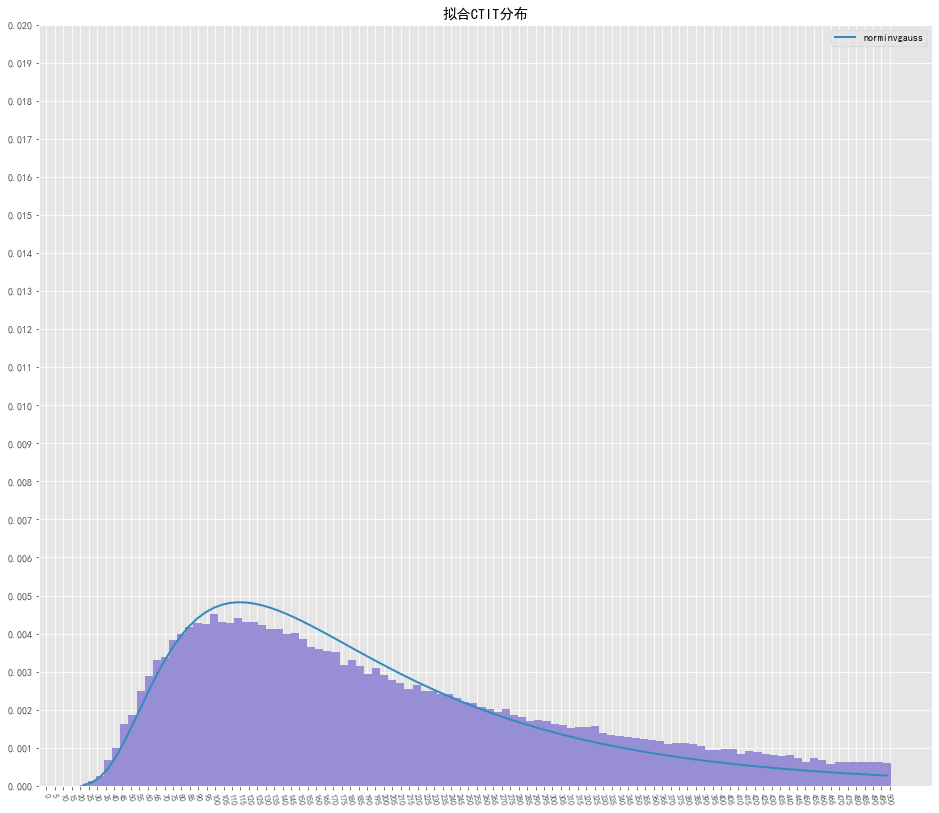

In [97]:
# 正态逆高斯连续随机变量。

from scipy.stats import norminvgauss, gamma
from scipy.stats import f as F
import matplotlib.pyplot as plt
from fitter import Fitter
import random
fig, ax = plt.subplots(1, 1)


# # F分布连续的随机变量
# a, b, loc, scale = 5.466298998250782, 312.0913309905686, 18.157045549058147, 78.10267376682765
# newts = F.rvs(a, b, loc=loc, scale=scale, size=800)

# gamma分布
# a, loc, scale = 2.673940463964837, 18.282129024694115, 29.396784678356912
# a, loc, scale = 1.620, 1.893, 49.491
# a, loc, scale = 2.676, -3.308, 29.369
# newts = gamma.rvs(a, loc=loc, scale=scale, size=1000)


# newts = random.sample(list(_newts), 300)

# 正态逆高斯分布
# 参数a是尾巴的重量, b是满足的不对称参数；满足 a>0,|b| < a  移动和缩放使用 loc、scale
# a, b = 21.1587, 20.1171
a, b, loc, scale = 21.158, 21.117, 8.260, 16.007    # hellovpn真实数据拟合
# a, b, loc, scale = 21.15865867593925, 21.1171404190502, 16.260021624931543, 16.006963234075396   # 买量数据拟合参数
# a, b, loc, scale = 61.698, 61.554,-4.066, 6.908   # r888  384渠道拟合
# a, b, loc, scale = 0.15574969996154991, 0.13112261910415027, 2.5570801541517517, 1.1505788503766108
# a, b, loc, scale = 0.156, 0.131, 2.557, 1.151

# a, b, loc, scale = 10.06, 10.04, 12, 16

# # 安装到打开
# 'invgauss': (0.4856500576494863, 0.5128946812111822, 41.435767191284285),
# 'lognorm': (0.6772690704947231, 1.4047058400261867, 15.353407001325937), 
# 'norminvgauss': (11.810050694259912, 11.66494755206594, 1.5821217687066331, 3.0147121224665177)    # hehe_device 数据

#a, b, loc, scale =21.158, 20, 8.260, 16.007 

datas = norminvgauss.rvs(a, b, loc=loc, scale=scale, size=100000)


# f = Fitter(datas, xmin=-1, xmax=51, distributions=['lognorm', 'norminvgauss'], bins=50)
f = Fitter(datas, xmin=-1, xmax=501, distributions=[ 'norminvgauss'], bins=100)
f.fit()

print(f.summary())
print(f.fitted_param)
# print(f.fitted_pdf)
print("*" * 24)
print(f.get_best())
f.hist()

# plt.ylim(0, 0.2)
# plt.xticks([int(_x) for _x in range(0,51, 1)], rotation=280, size=8)
# plt.yticks([_y/100 for _y in range(0, 21, 1)], size=10)

plt.ylim(0, 0.02)
plt.xticks([int(_x) for _x in range(0,501, 5)], rotation=280, size=8)
plt.yticks([_y/1000 for _y in range(0, 21, 1)], size=10)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False   # 正常显示负号
plt.title('拟合CTIT分布')
print(pd.Series(datas).describe())

plt.show()



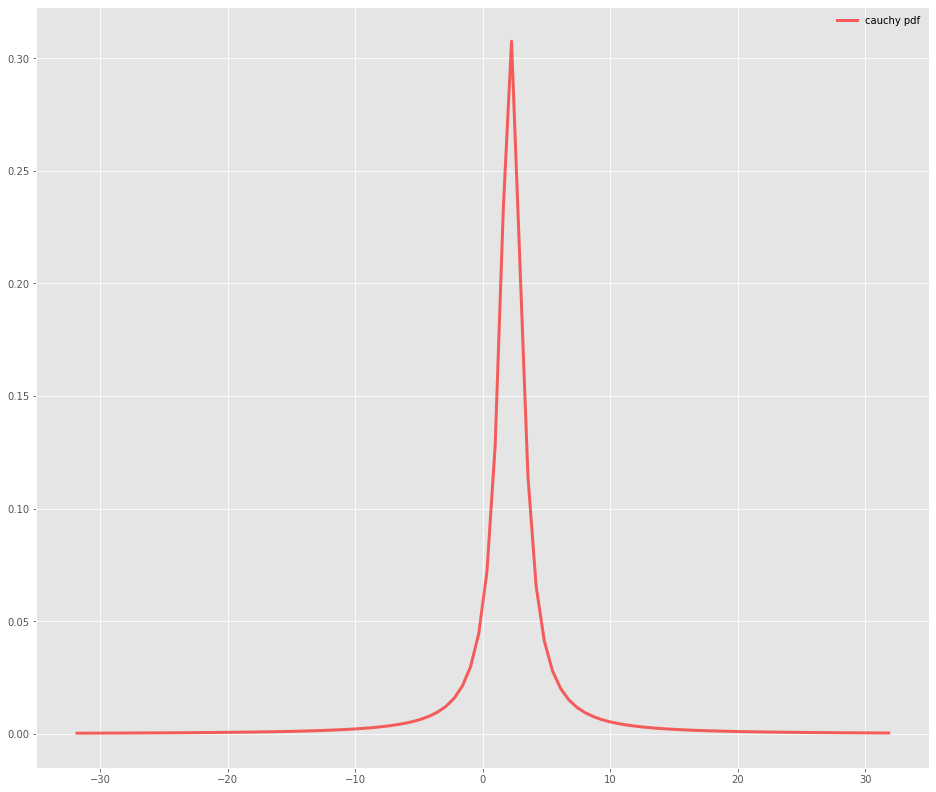

In [174]:
# 柯西连续型随机变量。

from scipy.stats import cauchy
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

loc = 2.191370806750376
scale = 1.0320590932798825
mean, var, skew, kurt = cauchy.stats(moments='mvsk')

x = np.linspace(cauchy.ppf(0.01),
                cauchy.ppf(0.99), 100)
ax.plot(x, cauchy.pdf(x, loc=loc, scale=scale),
       'r-', lw=3, alpha=0.6, label='cauchy pdf')

ax.legend(loc='best', frameon=False)
plt.show()

## t分布：
from scipy.stats import t   
概率密度函数：   
t.pdf(x, n)     　　　　　 # 返回t(n)的概率密度函数在x处的值   
概率分布函数：   
t.cdf(x, n)      　　　　　# 返回t(n)的概率密度函数在负无穷到x上的积分，也就是概率分布函数的值   
t.sf(x, n)      　　　　　 # 返回 1 - t.cdf(x, n)   
数学期望：   
t.expect( func = f , args=(n,) ) 　　　　　# 返回f(x)的期望   
分位数：   
t.isf(1-alpha, n)　　　　　# 返回值s满足：t.cdf(s, n) = alpha，  s就是alpha分位数   
t.ppf(alpha, n)  　　　　　# 返回值s满足：t.cdf(s, n) = alpha，  s就是alpha分位数   
分布的数量关系：   
t.mean(n)        　　　　　# t(n) 的均值   
t.var(n)         　　　　　# t(n) 的方差   
t.std(n)         　　　　　# t(n) 的方差再开平方根   
t.median(n)      　　　　　# t(n) 的中位数   
t.moment(a,n)    　　　　　# t(n) 的 a 阶原点矩   